Testing

#Testing 9


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 0.9467 - accuracy: 0.6447 - val_loss: 0.8250 - val_accuracy: 0.8000
Epoch 2/20
76/76 [==============================] - 0s 950us/step - loss: 0.6693 - accuracy: 0.8026 - val_loss: 0.6586 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 0s 843us/step - loss: 0.5043 - accuracy: 0.8553 - val_loss: 0.5265 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 0s 936us/step - loss: 0.3835 - accuracy: 0.8684 - val_loss: 0.4708 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 0s 926us/step - loss: 0.3051 - accuracy: 0.9211 - val_loss: 0.5072 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 872us/step - loss: 0.2504 - accuracy: 0.9342 - val_loss: 0.5539 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 1ms/step - loss: 0.2226 - accuracy: 0.9211 - val_l

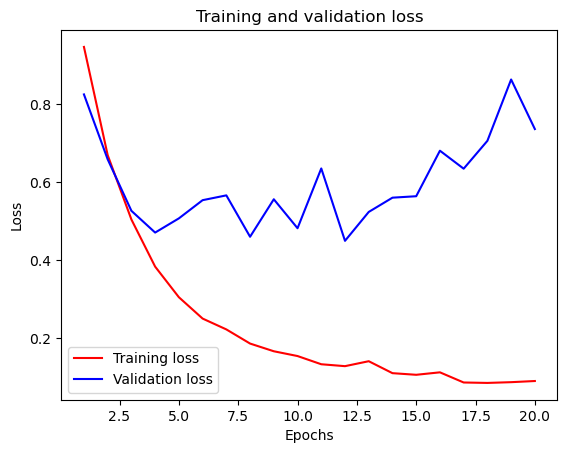

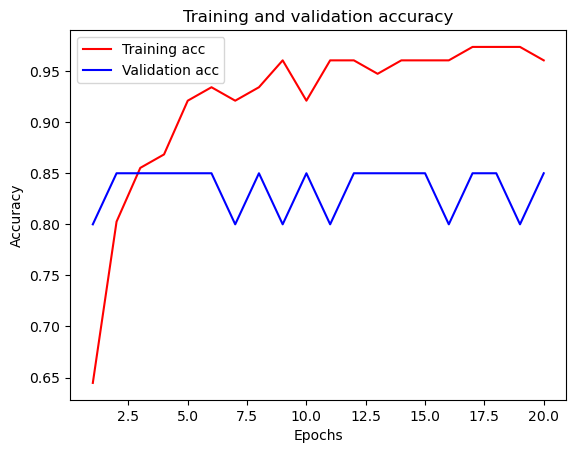

Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 1.2232 - accuracy: 0.1974 - val_loss: 1.2609 - val_accuracy: 0.1500
Epoch 2/20
76/76 [==============================] - 0s 918us/step - loss: 1.1093 - accuracy: 0.3158 - val_loss: 1.1423 - val_accuracy: 0.2000
Epoch 3/20
76/76 [==============================] - 0s 1ms/step - loss: 1.0163 - accuracy: 0.4342 - val_loss: 1.0496 - val_accuracy: 0.3500
Epoch 4/20
76/76 [==============================] - 0s 970us/step - loss: 0.9386 - accuracy: 0.5000 - val_loss: 0.9716 - val_accuracy: 0.4000
Epoch 5/20
76/76 [==============================] - 0s 915us/step - loss: 0.8705 - accuracy: 0.5526 - val_loss: 0.9029 - val_accuracy: 0.5500
Epoch 6/20
76/76 [==============================] - 0s 866us/step - loss: 0.8095 - accuracy: 0.5921 - val_loss: 0.8468 - val_accuracy: 0.6000
Epoch 7/20
76/76 [==============================] - 0s 647us/step - loss: 0.7570 - accuracy: 0.6184 - val_l

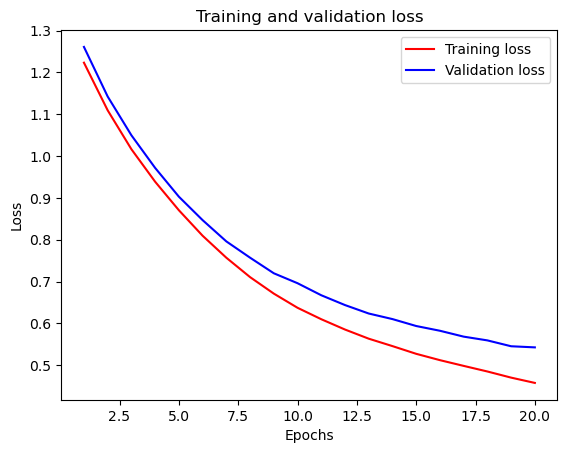

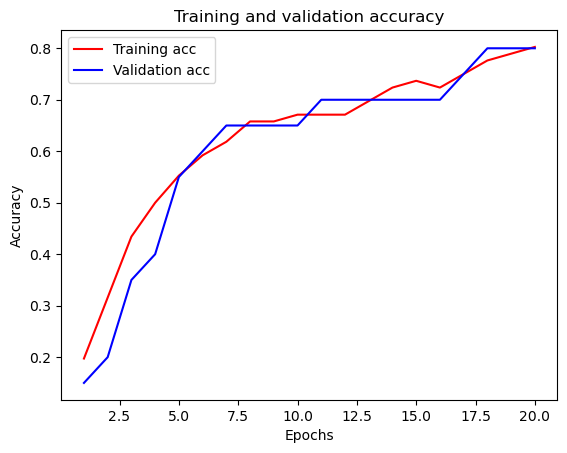

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(3, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 1.0164 - accuracy: 0.4211 - val_loss: 0.9322 - val_accuracy: 0.4500
Epoch 2/20
76/76 [==============================] - 0s 699us/step - loss: 0.8944 - accuracy: 0.5789 - val_loss: 0.8331 - val_accuracy: 0.7000
Epoch 3/20
76/76 [==============================] - 0s 659us/step - loss: 0.8034 - accuracy: 0.6711 - val_loss: 0.7753 - val_accuracy: 0.7500
Epoch 4/20
76/76 [==============================] - 0s 652us/step - loss: 0.7329 - accuracy: 0.6974 - val_loss: 0.7122 - val_accuracy: 0.7500
Epoch 5/20
76/76 [==============================] - 0s 618us/step - loss: 0.6764 - accuracy: 0.7105 - val_loss: 0.6713 - val_accuracy: 0.7500
Epoch 6/20
76/76 [==============================] - 0s 665us/step - loss: 0.6252 - accuracy: 0.7368 - val_loss: 0.6348 - val_accuracy: 0.7500
Epoch 7/20
76/76 [==============================] - 0s 703us/step - loss: 0.5863 - accuracy: 0.7500 - val

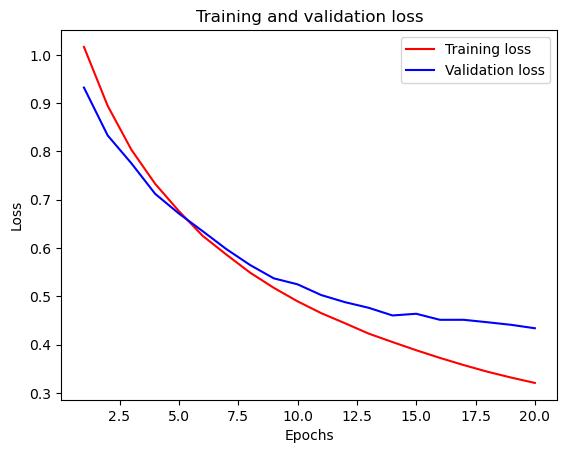

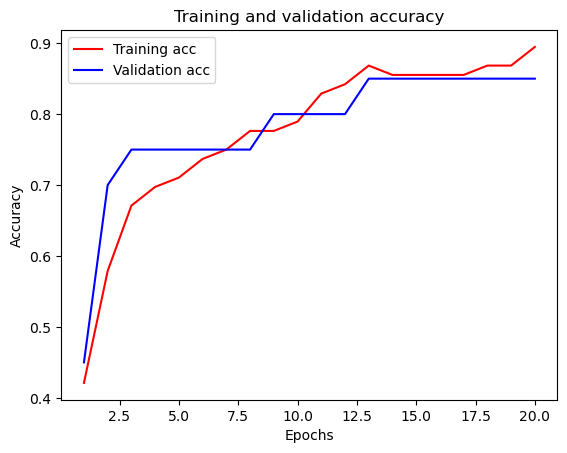

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(7, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(3, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/100
76/76 [==============================] - 0s 2ms/step - loss: 0.8839 - accuracy: 0.6053 - val_loss: 0.6964 - val_accuracy: 0.7500
Epoch 2/100
76/76 [==============================] - 0s 754us/step - loss: 0.7666 - accuracy: 0.7105 - val_loss: 0.6163 - val_accuracy: 0.7500
Epoch 3/100
76/76 [==============================] - 0s 621us/step - loss: 0.6810 - accuracy: 0.7368 - val_loss: 0.5603 - val_accuracy: 0.7500
Epoch 4/100
76/76 [==============================] - 0s 605us/step - loss: 0.6153 - accuracy: 0.7895 - val_loss: 0.5269 - val_accuracy: 0.7500
Epoch 5/100
76/76 [==============================] - 0s 874us/step - loss: 0.5627 - accuracy: 0.7895 - val_loss: 0.5058 - val_accuracy: 0.7500
Epoch 6/100
76/76 [==============================] - 0s 906us/step - loss: 0.5221 - accuracy: 0.7895 - val_loss: 0.4861 - val_accuracy: 0.7500
Epoch 7/100
76/76 [==============================] - 0s 789us/step - loss: 0.4879 - accuracy: 0.815

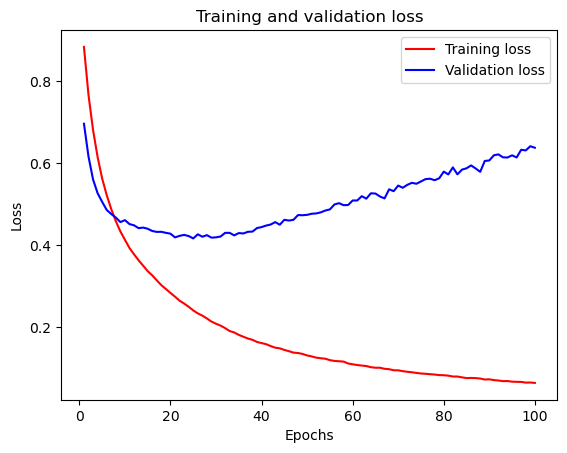

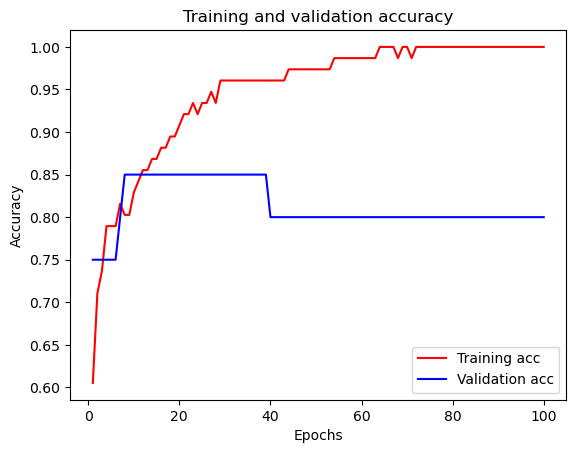

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(3, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 100
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 1.5978 - accuracy: 0.1053 - val_loss: 1.5656 - val_accuracy: 0.1000
Epoch 2/20
76/76 [==============================] - 0s 745us/step - loss: 1.3469 - accuracy: 0.1579 - val_loss: 1.3208 - val_accuracy: 0.2000
Epoch 3/20
76/76 [==============================] - 0s 625us/step - loss: 1.1626 - accuracy: 0.2763 - val_loss: 1.1338 - val_accuracy: 0.1500
Epoch 4/20
76/76 [==============================] - 0s 702us/step - loss: 1.0224 - accuracy: 0.3684 - val_loss: 0.9816 - val_accuracy: 0.3500
Epoch 5/20
76/76 [==============================] - 0s 731us/step - loss: 0.9132 - accuracy: 0.4474 - val_loss: 0.8802 - val_accuracy: 0.6000
Epoch 6/20
76/76 [==============================] - 0s 657us/step - loss: 0.8343 - accuracy: 0.5658 - val_loss: 0.8113 - val_accuracy: 0.7000
Epoch 7/20
76/76 [==============================] - 0s 650us/step - loss: 0.7745 - accuracy: 0.6053 - val

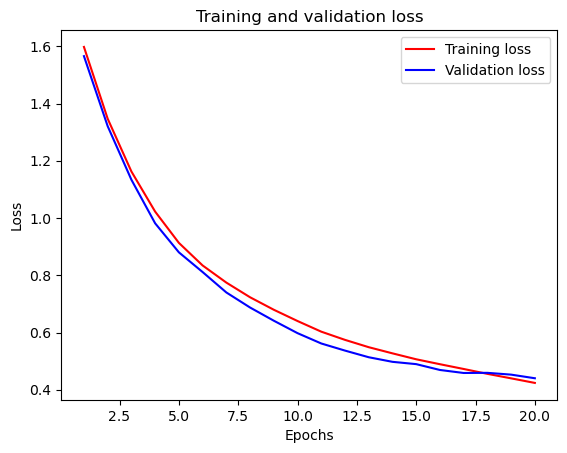

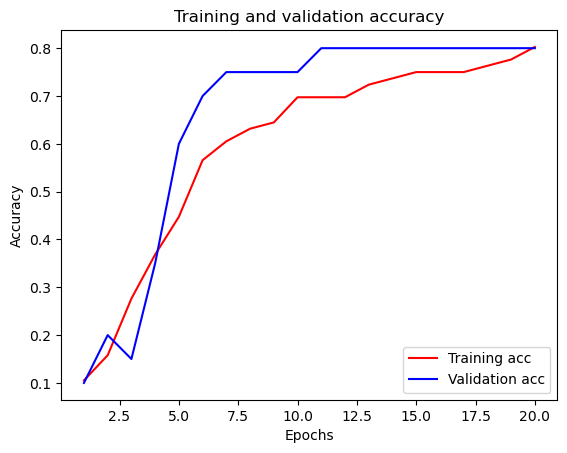

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(9, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(3, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 1.1970 - accuracy: 0.3289 - val_loss: 1.1563 - val_accuracy: 0.3000
Epoch 2/20
76/76 [==============================] - 0s 730us/step - loss: 0.9604 - accuracy: 0.4868 - val_loss: 1.0200 - val_accuracy: 0.3500
Epoch 3/20
76/76 [==============================] - 0s 704us/step - loss: 0.8205 - accuracy: 0.5658 - val_loss: 0.9469 - val_accuracy: 0.4500
Epoch 4/20
76/76 [==============================] - 0s 823us/step - loss: 0.7297 - accuracy: 0.6842 - val_loss: 0.8800 - val_accuracy: 0.6000
Epoch 5/20
76/76 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.8026 - val_loss: 0.8156 - val_accuracy: 0.7500
Epoch 6/20
76/76 [==============================] - 0s 793us/step - loss: 0.6002 - accuracy: 0.8421 - val_loss: 0.7505 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 0s 770us/step - loss: 0.5455 - accuracy: 0.8553 - val_l

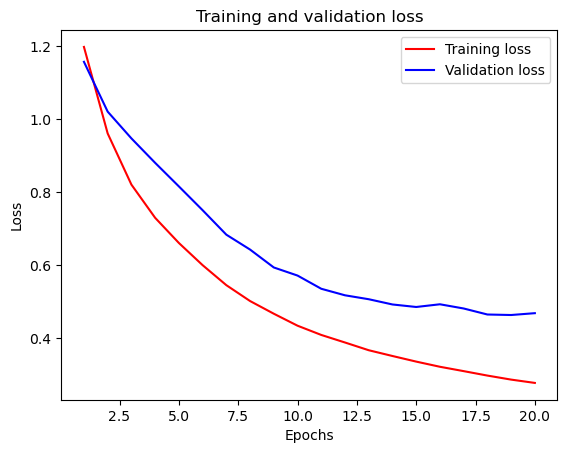

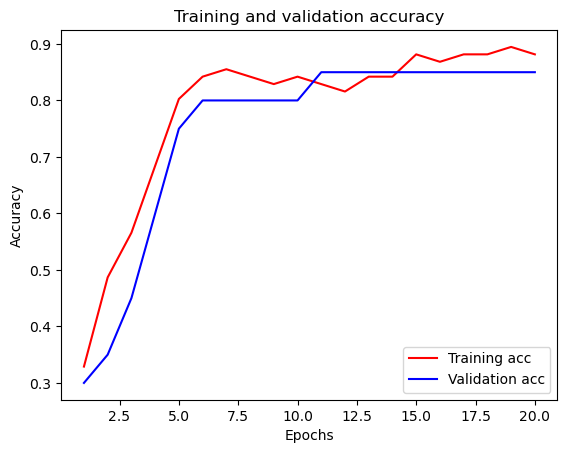

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(3, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 1.2735 - accuracy: 0.1974 - val_loss: 1.0819 - val_accuracy: 0.4000
Epoch 2/20
76/76 [==============================] - 0s 707us/step - loss: 1.0674 - accuracy: 0.2895 - val_loss: 0.9115 - val_accuracy: 0.5500
Epoch 3/20
76/76 [==============================] - 0s 634us/step - loss: 0.9089 - accuracy: 0.5000 - val_loss: 0.7751 - val_accuracy: 0.8000
Epoch 4/20
76/76 [==============================] - 0s 653us/step - loss: 0.7821 - accuracy: 0.7632 - val_loss: 0.6645 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 0s 626us/step - loss: 0.6815 - accuracy: 0.8158 - val_loss: 0.5743 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 618us/step - loss: 0.6022 - accuracy: 0.8289 - val_loss: 0.5211 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 632us/step - loss: 0.5421 - accuracy: 0.8684 - val

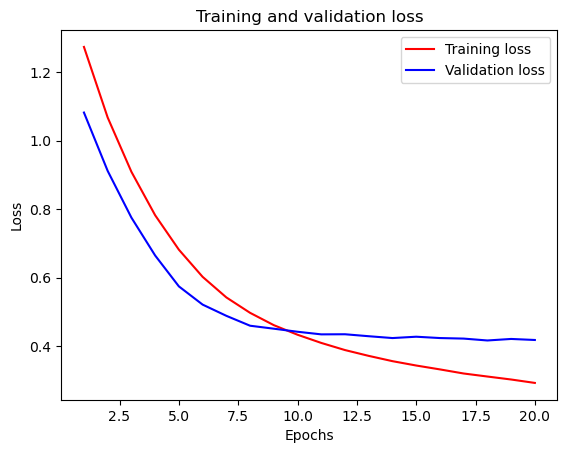

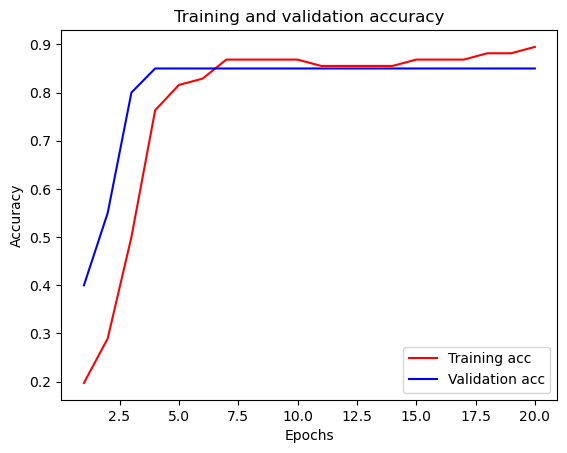

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(11, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(3, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 1.2254 - accuracy: 0.4868 - val_loss: 1.2245 - val_accuracy: 0.3000
Epoch 2/20
76/76 [==============================] - 0s 712us/step - loss: 0.9509 - accuracy: 0.5132 - val_loss: 0.9315 - val_accuracy: 0.3500
Epoch 3/20
76/76 [==============================] - 0s 654us/step - loss: 0.7604 - accuracy: 0.6316 - val_loss: 0.7191 - val_accuracy: 0.7000
Epoch 4/20
76/76 [==============================] - 0s 665us/step - loss: 0.6362 - accuracy: 0.7237 - val_loss: 0.6115 - val_accuracy: 0.7500
Epoch 5/20
76/76 [==============================] - 0s 684us/step - loss: 0.5679 - accuracy: 0.7763 - val_loss: 0.5620 - val_accuracy: 0.7500
Epoch 6/20
76/76 [==============================] - 0s 625us/step - loss: 0.5169 - accuracy: 0.8158 - val_loss: 0.5238 - val_accuracy: 0.7500
Epoch 7/20
76/76 [==============================] - 0s 697us/step - loss: 0.4809 - accuracy: 0.8421 - val

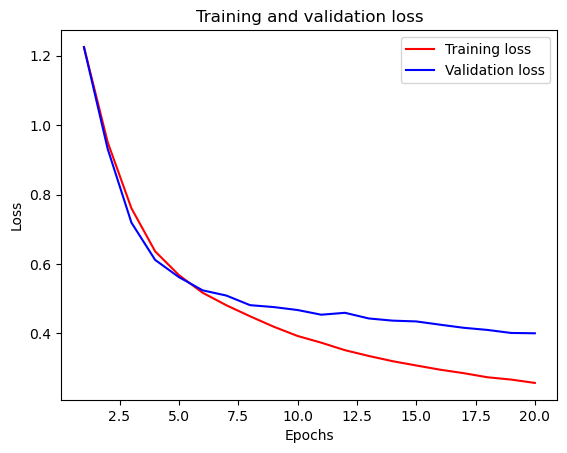

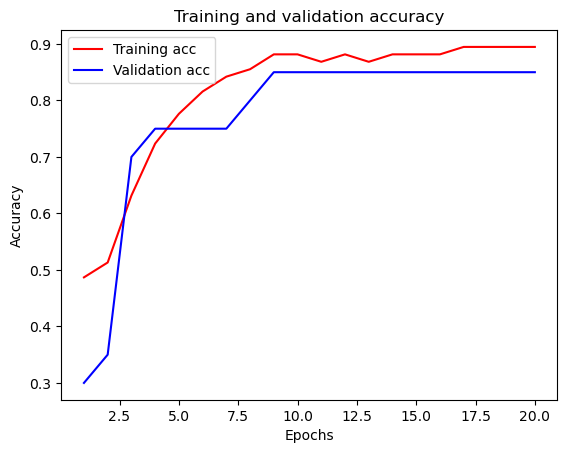

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(12, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(3, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 1.1525 - accuracy: 0.3421 - val_loss: 0.9974 - val_accuracy: 0.4000
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 0.9293 - accuracy: 0.5789 - val_loss: 0.8522 - val_accuracy: 0.7000
Epoch 3/20
76/76 [==============================] - 0s 1ms/step - loss: 0.7844 - accuracy: 0.7105 - val_loss: 0.7565 - val_accuracy: 0.8000
Epoch 4/20
76/76 [==============================] - 0s 958us/step - loss: 0.6796 - accuracy: 0.7500 - val_loss: 0.6770 - val_accuracy: 0.8000
Epoch 5/20
76/76 [==============================] - 0s 1ms/step - loss: 0.6035 - accuracy: 0.7763 - val_loss: 0.6056 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 943us/step - loss: 0.5441 - accuracy: 0.7763 - val_loss: 0.5589 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 1ms/step - loss: 0.4999 - accuracy: 0.8026 - val_loss: 0

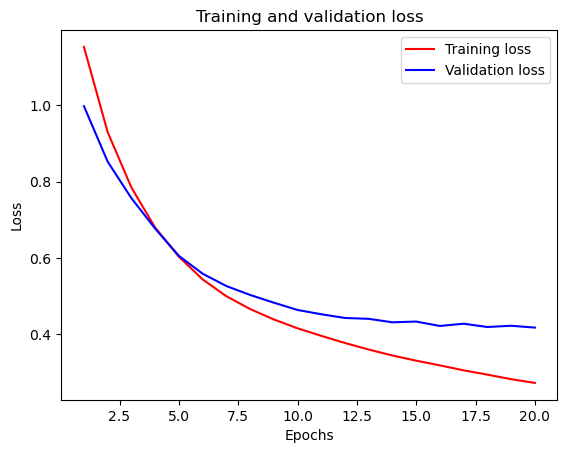

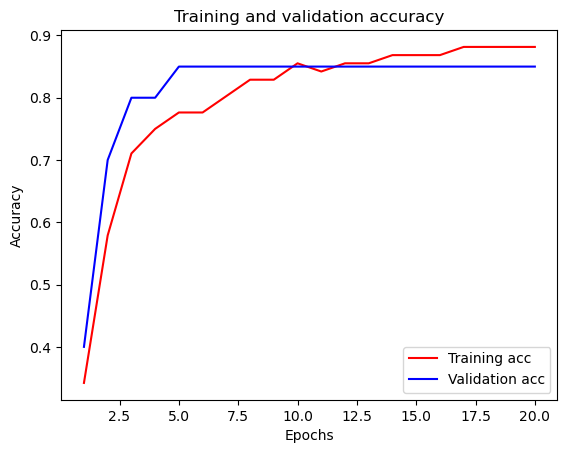

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(13, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(3, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 0.9280 - accuracy: 0.5526 - val_loss: 0.9194 - val_accuracy: 0.6000
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 0.7490 - accuracy: 0.6711 - val_loss: 0.7602 - val_accuracy: 0.7000
Epoch 3/20
76/76 [==============================] - 0s 983us/step - loss: 0.6390 - accuracy: 0.6842 - val_loss: 0.6713 - val_accuracy: 0.7500
Epoch 4/20
76/76 [==============================] - 0s 940us/step - loss: 0.5674 - accuracy: 0.7368 - val_loss: 0.6061 - val_accuracy: 0.7500
Epoch 5/20
76/76 [==============================] - 0s 881us/step - loss: 0.5167 - accuracy: 0.7895 - val_loss: 0.5722 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 849us/step - loss: 0.4792 - accuracy: 0.8026 - val_loss: 0.5402 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 913us/step - loss: 0.4473 - accuracy: 0.8289 - val_l

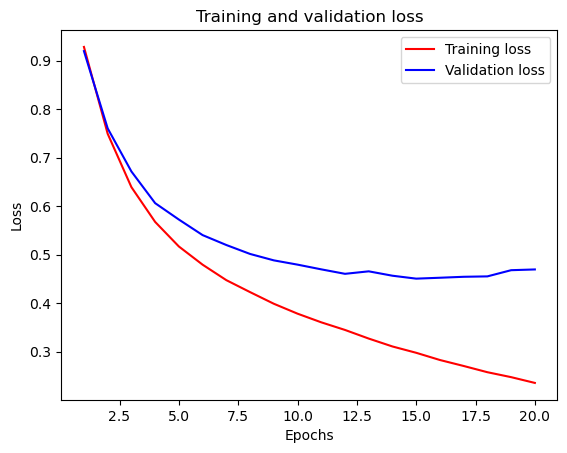

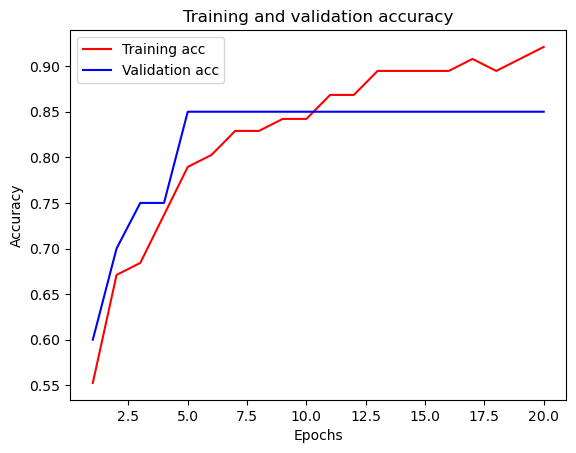

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(14, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(3, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 1.0153 - accuracy: 0.3947 - val_loss: 0.7879 - val_accuracy: 0.6500
Epoch 2/20
76/76 [==============================] - 0s 906us/step - loss: 0.8295 - accuracy: 0.5395 - val_loss: 0.6312 - val_accuracy: 0.6000
Epoch 3/20
76/76 [==============================] - 0s 823us/step - loss: 0.7058 - accuracy: 0.7368 - val_loss: 0.5458 - val_accuracy: 0.8000
Epoch 4/20
76/76 [==============================] - 0s 846us/step - loss: 0.6155 - accuracy: 0.8553 - val_loss: 0.4955 - val_accuracy: 0.8000
Epoch 5/20
76/76 [==============================] - 0s 929us/step - loss: 0.5422 - accuracy: 0.8421 - val_loss: 0.4632 - val_accuracy: 0.8000
Epoch 6/20
76/76 [==============================] - 0s 885us/step - loss: 0.4885 - accuracy: 0.8421 - val_loss: 0.4504 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 0s 908us/step - loss: 0.4449 - accuracy: 0.8421 - val

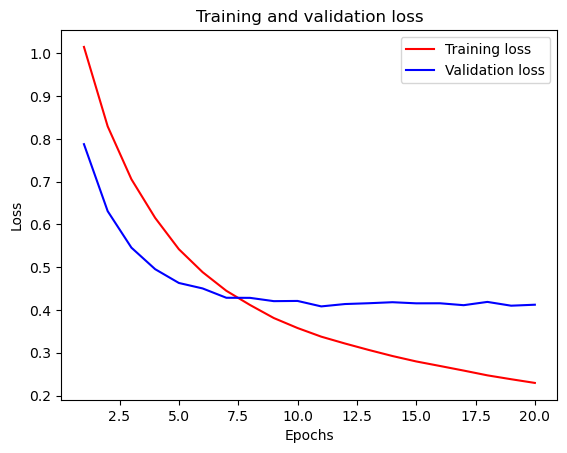

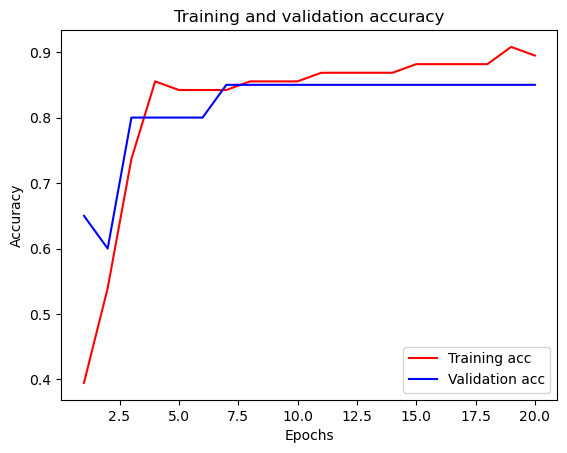

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(15, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(3, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 1.2241 - accuracy: 0.2368 - val_loss: 1.0189 - val_accuracy: 0.4500
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 1.0138 - accuracy: 0.3684 - val_loss: 0.8352 - val_accuracy: 0.5500
Epoch 3/20
76/76 [==============================] - 0s 921us/step - loss: 0.8707 - accuracy: 0.5263 - val_loss: 0.7069 - val_accuracy: 0.7500
Epoch 4/20
76/76 [==============================] - 0s 862us/step - loss: 0.7656 - accuracy: 0.6974 - val_loss: 0.6150 - val_accuracy: 0.7500
Epoch 5/20
76/76 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.7632 - val_loss: 0.5616 - val_accuracy: 0.8000
Epoch 6/20
76/76 [==============================] - 0s 1ms/step - loss: 0.6027 - accuracy: 0.8026 - val_loss: 0.5140 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 0s 866us/step - loss: 0.5444 - accuracy: 0.8158 - val_loss:

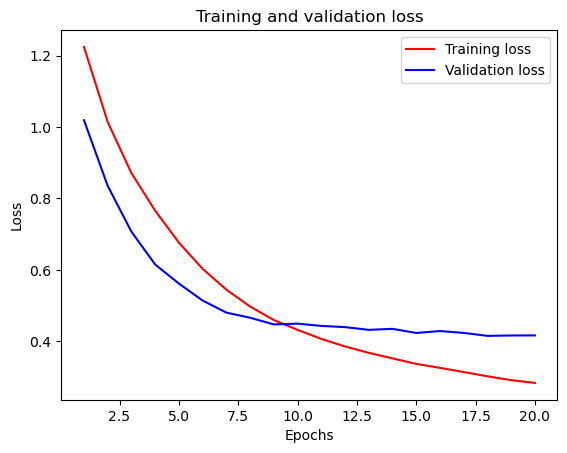

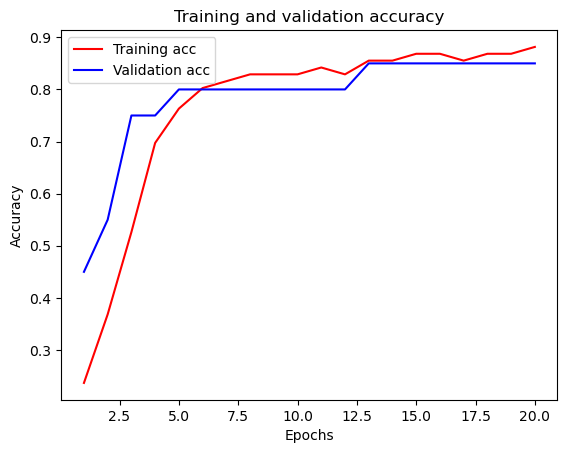

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(3, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 0.9805 - accuracy: 0.4474 - val_loss: 0.8557 - val_accuracy: 0.7000
Epoch 2/20
76/76 [==============================] - 0s 994us/step - loss: 0.7978 - accuracy: 0.7632 - val_loss: 0.6946 - val_accuracy: 0.8000
Epoch 3/20
76/76 [==============================] - 0s 981us/step - loss: 0.6657 - accuracy: 0.8026 - val_loss: 0.5941 - val_accuracy: 0.8000
Epoch 4/20
76/76 [==============================] - 0s 1ms/step - loss: 0.5720 - accuracy: 0.8289 - val_loss: 0.5282 - val_accuracy: 0.8000
Epoch 5/20
76/76 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.8421 - val_loss: 0.5023 - val_accuracy: 0.8000
Epoch 6/20
76/76 [==============================] - 0s 932us/step - loss: 0.4590 - accuracy: 0.8421 - val_loss: 0.4840 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8421 - val_loss:

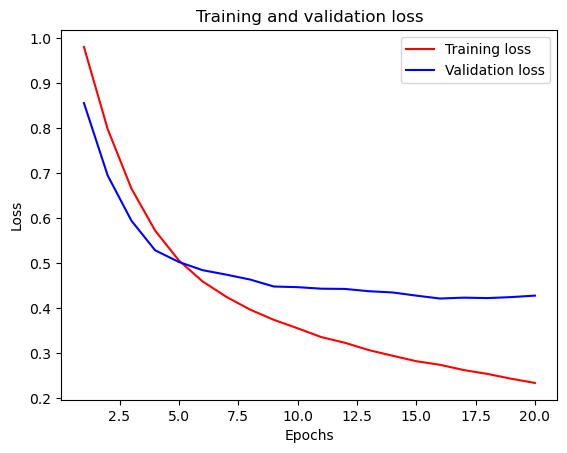

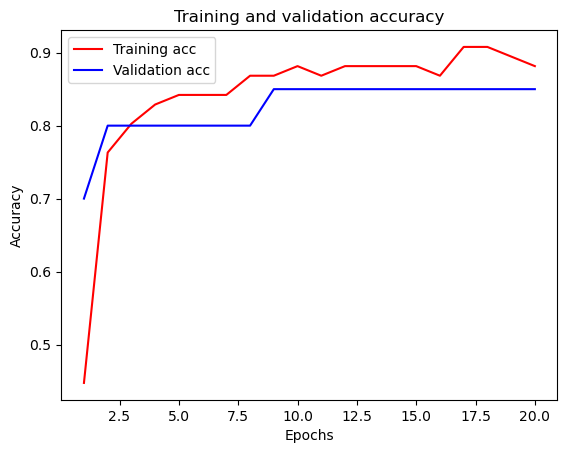

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(17, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 1.2232 - accuracy: 0.3289 - val_loss: 1.0248 - val_accuracy: 0.5000
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 0.9124 - accuracy: 0.6579 - val_loss: 0.8572 - val_accuracy: 0.7500
Epoch 3/20
76/76 [==============================] - 0s 1ms/step - loss: 0.7536 - accuracy: 0.7237 - val_loss: 0.7606 - val_accuracy: 0.7500
Epoch 4/20
76/76 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.7632 - val_loss: 0.6768 - val_accuracy: 0.7500
Epoch 5/20
76/76 [==============================] - 0s 955us/step - loss: 0.5802 - accuracy: 0.7895 - val_loss: 0.6136 - val_accuracy: 0.8000
Epoch 6/20
76/76 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.8158 - val_loss: 0.5654 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 0s 927us/step - loss: 0.4765 - accuracy: 0.8421 - val_loss: 0

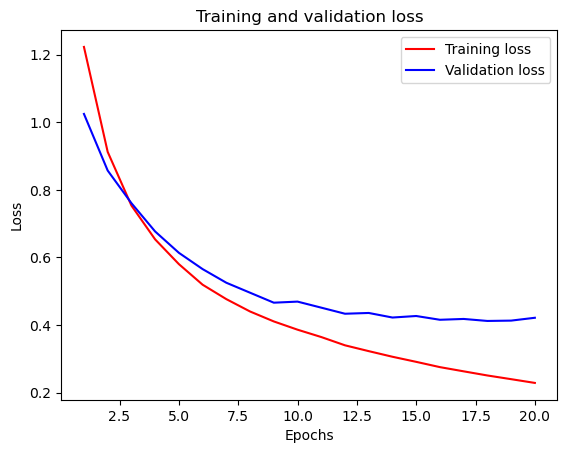

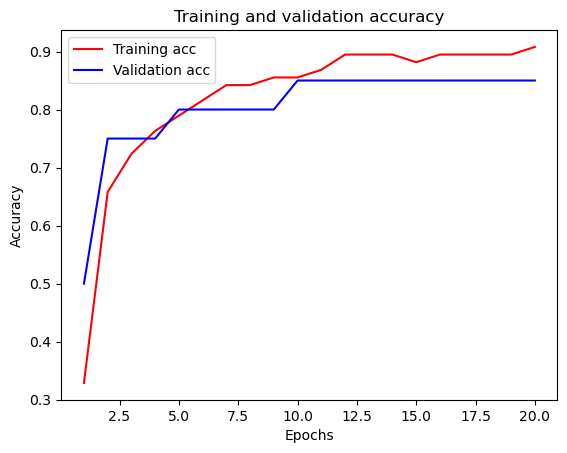

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(18, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(3, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 1.0877 - accuracy: 0.3421 - val_loss: 1.0621 - val_accuracy: 0.7000
Epoch 2/20
76/76 [==============================] - 0s 857us/step - loss: 1.0736 - accuracy: 0.4737 - val_loss: 1.0506 - val_accuracy: 0.8000
Epoch 3/20
76/76 [==============================] - 0s 808us/step - loss: 1.0557 - accuracy: 0.6974 - val_loss: 1.0335 - val_accuracy: 0.8000
Epoch 4/20
76/76 [==============================] - 0s 989us/step - loss: 1.0296 - accuracy: 0.8158 - val_loss: 1.0136 - val_accuracy: 0.8000
Epoch 5/20
76/76 [==============================] - 0s 1ms/step - loss: 1.0001 - accuracy: 0.7632 - val_loss: 0.9904 - val_accuracy: 0.8000
Epoch 6/20
76/76 [==============================] - 0s 934us/step - loss: 0.9752 - accuracy: 0.7105 - val_loss: 0.9665 - val_accuracy: 0.7500
Epoch 7/20
76/76 [==============================] - 0s 862us/step - loss: 0.9488 - accuracy: 0.7763 - val_l

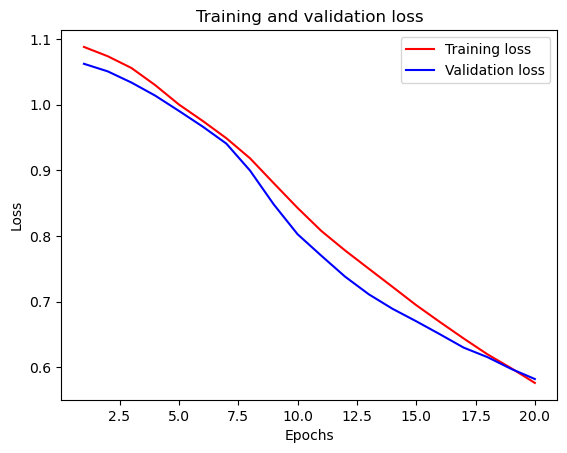

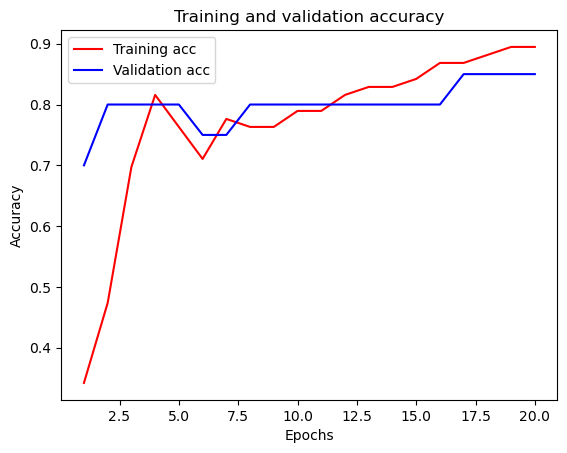

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(7, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 1.1863 - accuracy: 0.2105 - val_loss: 1.1278 - val_accuracy: 0.3000
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 1.1480 - accuracy: 0.2368 - val_loss: 1.1038 - val_accuracy: 0.5000
Epoch 3/20
76/76 [==============================] - 0s 962us/step - loss: 1.1164 - accuracy: 0.2763 - val_loss: 1.0841 - val_accuracy: 0.4500
Epoch 4/20
76/76 [==============================] - 0s 737us/step - loss: 1.0839 - accuracy: 0.3026 - val_loss: 1.0572 - val_accuracy: 0.5000
Epoch 5/20
76/76 [==============================] - 0s 677us/step - loss: 1.0498 - accuracy: 0.4079 - val_loss: 1.0237 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 761us/step - loss: 1.0076 - accuracy: 0.7368 - val_loss: 0.9789 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 875us/step - loss: 0.9502 - accuracy: 0.8026 - val_l

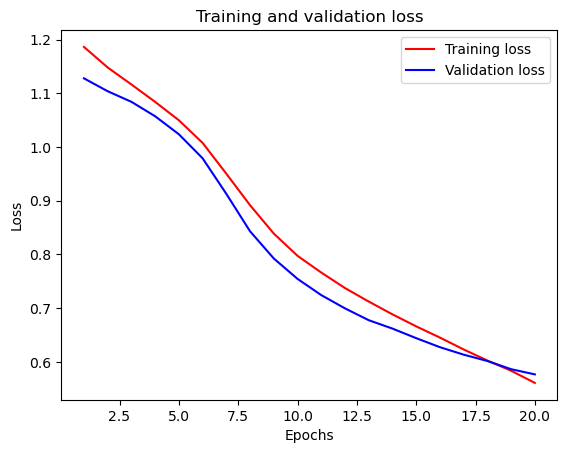

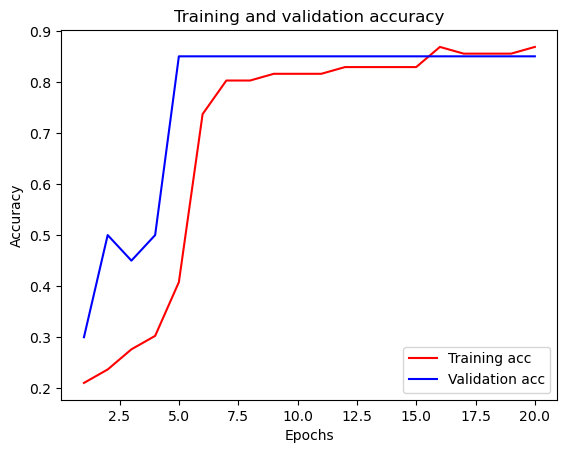

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 1.0846 - accuracy: 0.4605 - val_loss: 1.0383 - val_accuracy: 0.7500
Epoch 2/20
76/76 [==============================] - 0s 883us/step - loss: 1.0352 - accuracy: 0.6447 - val_loss: 0.9789 - val_accuracy: 0.7500
Epoch 3/20
76/76 [==============================] - 0s 744us/step - loss: 0.9711 - accuracy: 0.6711 - val_loss: 0.8923 - val_accuracy: 0.7500
Epoch 4/20
76/76 [==============================] - 0s 693us/step - loss: 0.8933 - accuracy: 0.6711 - val_loss: 0.7970 - val_accuracy: 0.7500
Epoch 5/20
76/76 [==============================] - 0s 692us/step - loss: 0.8231 - accuracy: 0.6711 - val_loss: 0.7390 - val_accuracy: 0.7500
Epoch 6/20
76/76 [==============================] - 0s 831us/step - loss: 0.7712 - accuracy: 0.6711 - val_loss: 0.6964 - val_accuracy: 0.7500
Epoch 7/20
76/76 [==============================] - 0s 714us/step - loss: 0.7339 - accuracy: 0.7500 - val

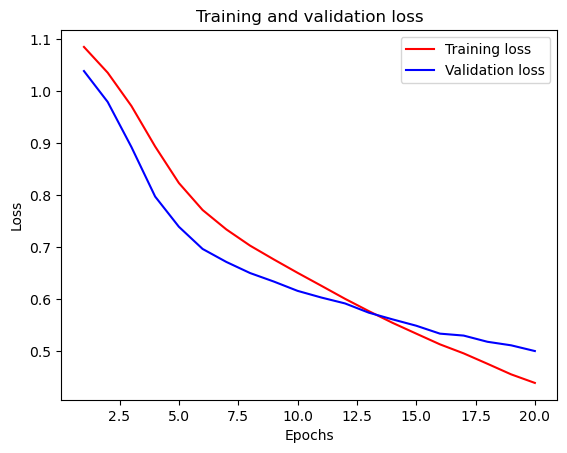

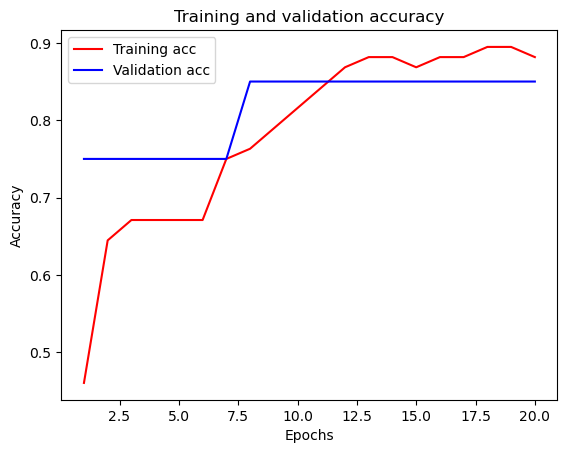

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(12, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 0.9914 - accuracy: 0.5395 - val_loss: 0.9490 - val_accuracy: 0.3000
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 0.8493 - accuracy: 0.5658 - val_loss: 0.8603 - val_accuracy: 0.3000
Epoch 3/20
76/76 [==============================] - 0s 1ms/step - loss: 0.7474 - accuracy: 0.5000 - val_loss: 0.7920 - val_accuracy: 0.7000
Epoch 4/20
76/76 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.7500 - val_loss: 0.7314 - val_accuracy: 0.8000
Epoch 5/20
76/76 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.8026 - val_loss: 0.6630 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 987us/step - loss: 0.5162 - accuracy: 0.8026 - val_loss: 0.6042 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 1000us/step - loss: 0.4639 - accuracy: 0.8289 - val_loss: 

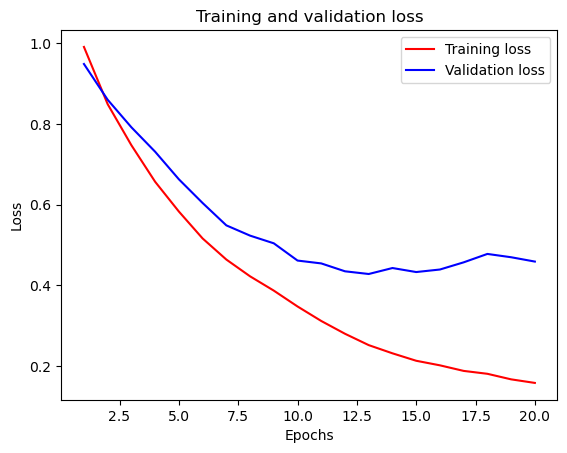

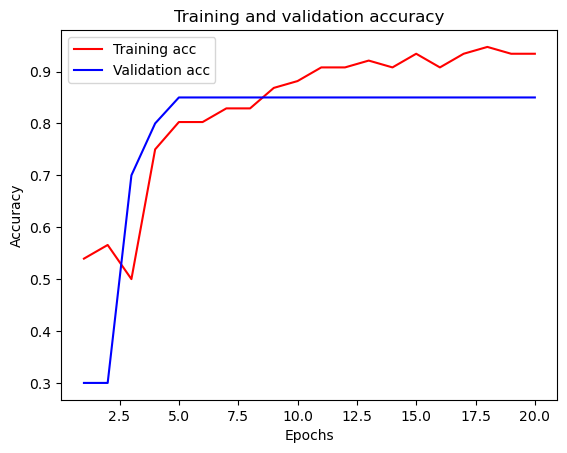

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 0.9855 - accuracy: 0.5658 - val_loss: 0.8054 - val_accuracy: 0.7000
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 0.7121 - accuracy: 0.7368 - val_loss: 0.5897 - val_accuracy: 0.8000
Epoch 3/20
76/76 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.8289 - val_loss: 0.4776 - val_accuracy: 0.8000
Epoch 4/20
76/76 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8158 - val_loss: 0.4519 - val_accuracy: 0.8000
Epoch 5/20
76/76 [==============================] - 0s 951us/step - loss: 0.3732 - accuracy: 0.8553 - val_loss: 0.4331 - val_accuracy: 0.8000
Epoch 6/20
76/76 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8553 - val_loss: 0.4113 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8947 - val_loss: 0.4

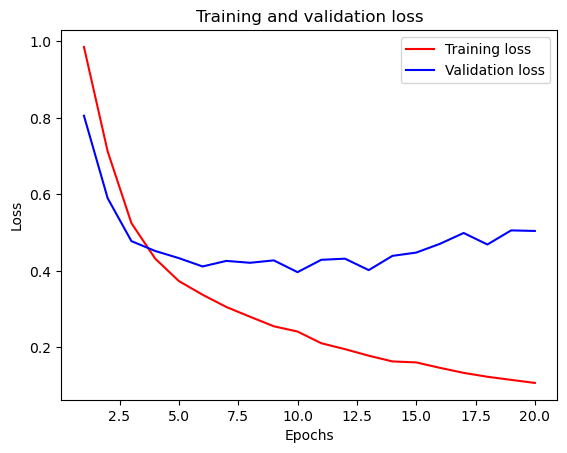

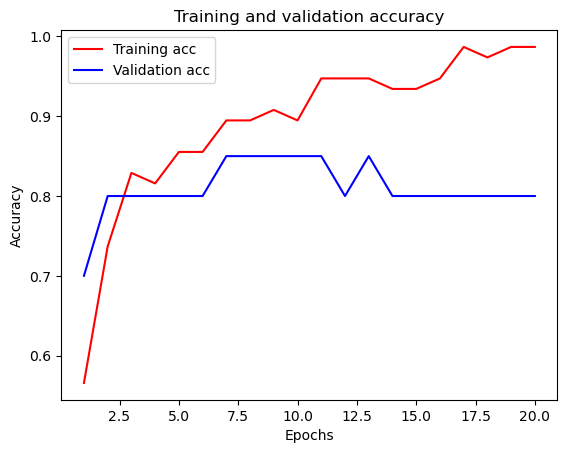

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 0.9048 - accuracy: 0.5921 - val_loss: 0.6238 - val_accuracy: 0.8000
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 0.5759 - accuracy: 0.7763 - val_loss: 0.4657 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 0s 947us/step - loss: 0.4179 - accuracy: 0.8421 - val_loss: 0.4032 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 0s 1ms/step - loss: 0.3199 - accuracy: 0.8816 - val_loss: 0.4286 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.8947 - val_loss: 0.4150 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 1ms/step - loss: 0.2231 - accuracy: 0.9079 - val_loss: 0.4054 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 969us/step - loss: 0.1865 - accuracy: 0.9342 - val_loss: 0

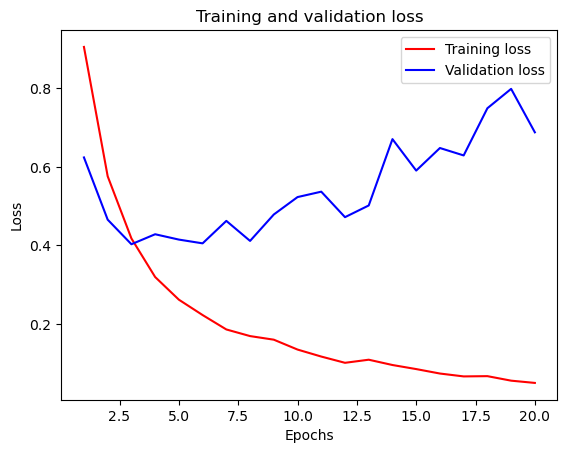

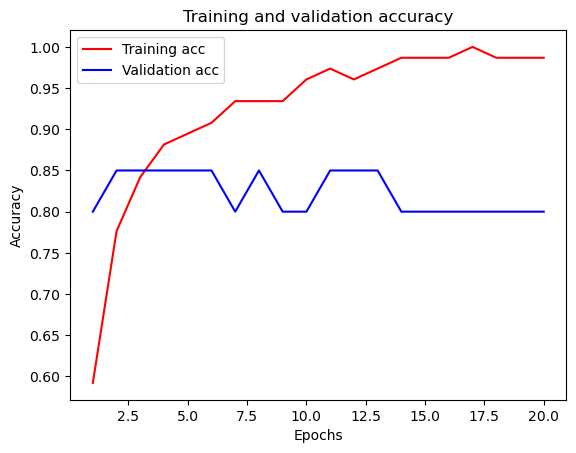

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 0.7914 - accuracy: 0.7105 - val_loss: 0.4652 - val_accuracy: 0.8000
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8421 - val_loss: 0.4726 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 0s 1ms/step - loss: 0.3269 - accuracy: 0.8289 - val_loss: 0.4415 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 0s 1ms/step - loss: 0.2524 - accuracy: 0.9079 - val_loss: 0.3838 - val_accuracy: 0.8000
Epoch 5/20
76/76 [==============================] - 0s 1ms/step - loss: 0.2285 - accuracy: 0.9079 - val_loss: 0.3667 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 1ms/step - loss: 0.1772 - accuracy: 0.9342 - val_loss: 0.5386 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 0s 1ms/step - loss: 0.1665 - accuracy: 0.9605 - val_loss: 0.543

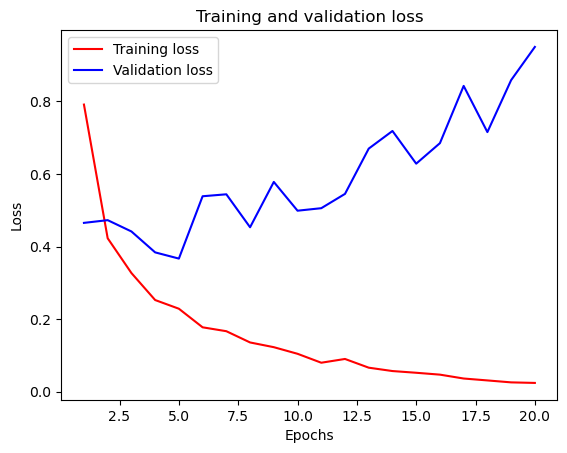

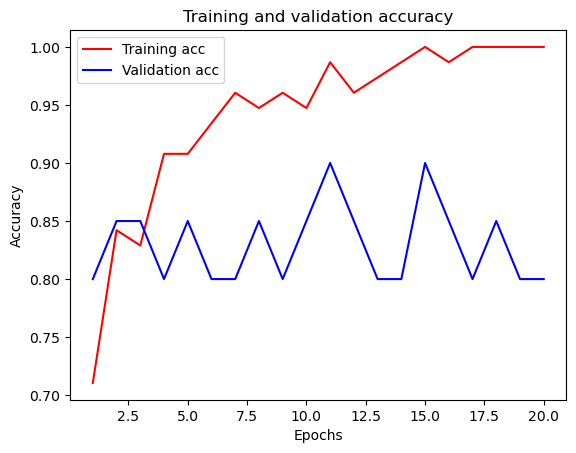

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.7632 - val_loss: 0.3338 - val_accuracy: 0.8500
Epoch 2/20
76/76 [==============================] - 0s 913us/step - loss: 0.3202 - accuracy: 0.8684 - val_loss: 0.4094 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 0s 700us/step - loss: 0.2505 - accuracy: 0.8947 - val_loss: 0.3533 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 0s 888us/step - loss: 0.1836 - accuracy: 0.9605 - val_loss: 0.4964 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 0s 751us/step - loss: 0.1354 - accuracy: 0.9737 - val_loss: 0.5577 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 711us/step - loss: 0.1270 - accuracy: 0.9474 - val_loss: 0.4639 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 0s 832us/step - loss: 0.1485 - accuracy: 0.9342 - val

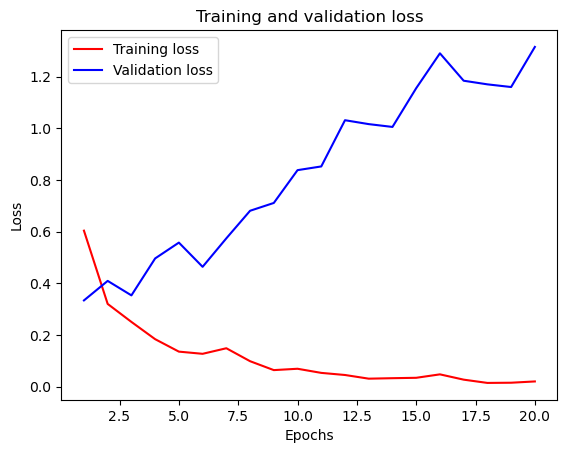

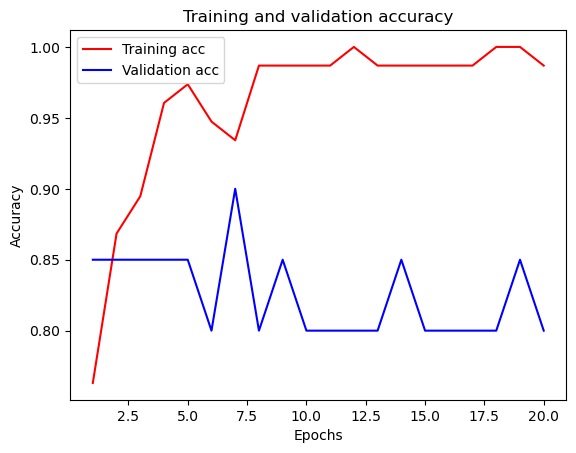

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 0.6265 - accuracy: 0.7105 - val_loss: 0.5707 - val_accuracy: 0.8000
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 0.3079 - accuracy: 0.8684 - val_loss: 0.5851 - val_accuracy: 0.7500
Epoch 3/20
76/76 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.9211 - val_loss: 0.4365 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.8684 - val_loss: 0.4336 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 0s 2ms/step - loss: 0.1430 - accuracy: 0.9474 - val_loss: 0.4097 - val_accuracy: 0.9000
Epoch 6/20
76/76 [==============================] - 0s 2ms/step - loss: 0.1351 - accuracy: 0.9605 - val_loss: 0.7334 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9737 - val_loss: 0.907

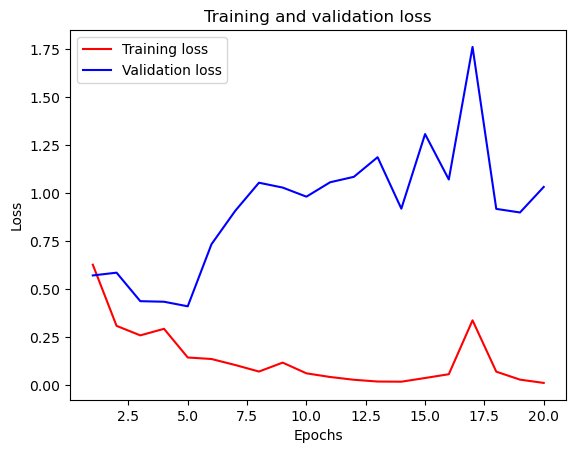

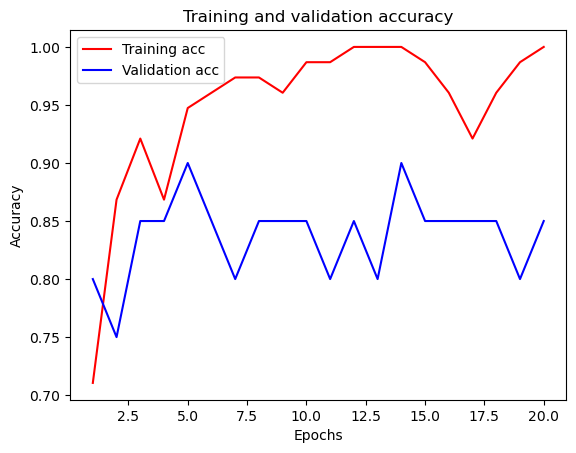

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 1s 8ms/step - loss: 0.5581 - accuracy: 0.7500 - val_loss: 0.4679 - val_accuracy: 0.8000
Epoch 2/20
76/76 [==============================] - 0s 6ms/step - loss: 0.3860 - accuracy: 0.8289 - val_loss: 0.4549 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 0s 6ms/step - loss: 0.2267 - accuracy: 0.9079 - val_loss: 0.6604 - val_accuracy: 0.8000
Epoch 4/20
76/76 [==============================] - 0s 6ms/step - loss: 0.1878 - accuracy: 0.9211 - val_loss: 0.6993 - val_accuracy: 0.8000
Epoch 5/20
76/76 [==============================] - 0s 6ms/step - loss: 0.1511 - accuracy: 0.9342 - val_loss: 0.5759 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 6ms/step - loss: 0.1723 - accuracy: 0.9474 - val_loss: 0.8429 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 6ms/step - loss: 0.1099 - accuracy: 0.9474 - val_loss: 0.935

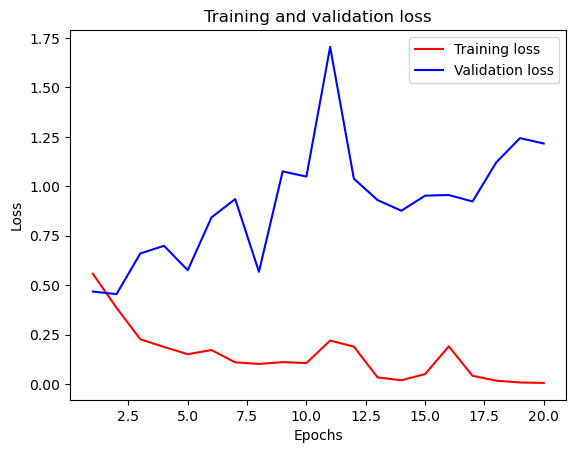

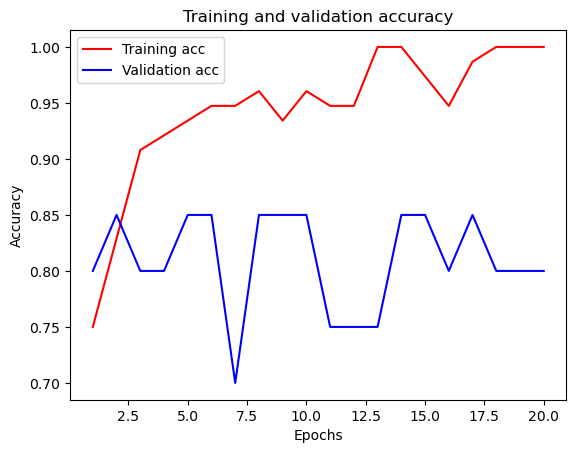

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 2s 23ms/step - loss: 1.0706 - accuracy: 0.6316 - val_loss: 1.0176 - val_accuracy: 0.7500
Epoch 2/20
76/76 [==============================] - 2s 21ms/step - loss: 0.9841 - accuracy: 0.8026 - val_loss: 0.9496 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 2s 21ms/step - loss: 0.9174 - accuracy: 0.8816 - val_loss: 0.8932 - val_accuracy: 0.9000
Epoch 4/20
76/76 [==============================] - 2s 21ms/step - loss: 0.8608 - accuracy: 0.9079 - val_loss: 0.8729 - val_accuracy: 0.8000
Epoch 5/20
76/76 [==============================] - 2s 22ms/step - loss: 0.8282 - accuracy: 0.8816 - val_loss: 0.8129 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 2s 21ms/step - loss: 0.7559 - accuracy: 0.9342 - val_loss: 0.8260 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 2s 21ms/step - loss: 0.7199 - accuracy: 0.9079 - val_loss

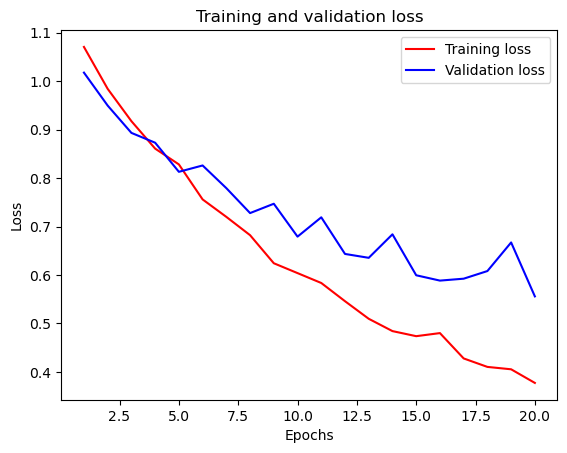

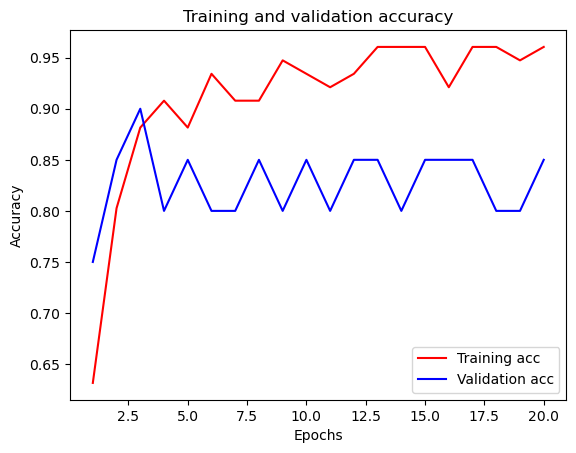

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 6s 79ms/step - loss: 1.0799 - accuracy: 0.6184 - val_loss: 1.0272 - val_accuracy: 0.7500
Epoch 2/20
76/76 [==============================] - 6s 79ms/step - loss: 0.9972 - accuracy: 0.7763 - val_loss: 0.9570 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 6s 81ms/step - loss: 0.9582 - accuracy: 0.8026 - val_loss: 0.9169 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 6s 80ms/step - loss: 0.8985 - accuracy: 0.8421 - val_loss: 0.8945 - val_accuracy: 0.8000
Epoch 5/20
76/76 [==============================] - 6s 81ms/step - loss: 0.8552 - accuracy: 0.8553 - val_loss: 0.8470 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 6s 80ms/step - loss: 0.8042 - accuracy: 0.9079 - val_loss: 0.8096 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 6s 81ms/step - loss: 0.7781 - accuracy: 0.8684 - val_loss

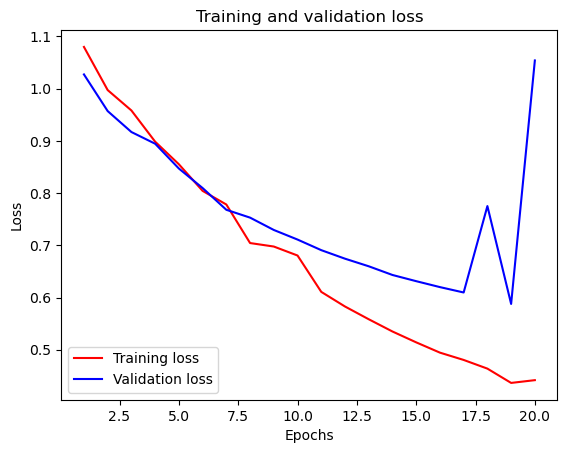

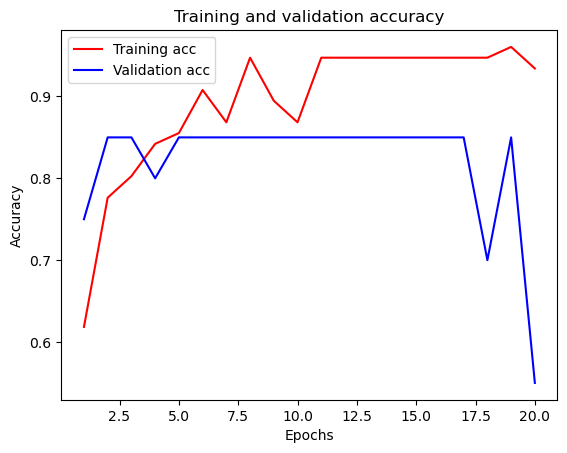

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(4096, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 25s 323ms/step - loss: 1.0800 - accuracy: 0.5921 - val_loss: 1.0404 - val_accuracy: 0.7500
Epoch 2/20
76/76 [==============================] - 23s 306ms/step - loss: 1.0203 - accuracy: 0.7895 - val_loss: 0.9818 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 23s 307ms/step - loss: 0.9696 - accuracy: 0.8289 - val_loss: 0.9349 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 23s 305ms/step - loss: 0.9615 - accuracy: 0.7368 - val_loss: 0.9715 - val_accuracy: 0.6500
Epoch 5/20
76/76 [==============================] - 23s 304ms/step - loss: 0.8822 - accuracy: 0.8684 - val_loss: 0.8674 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 23s 304ms/step - loss: 0.8678 - accuracy: 0.8289 - val_loss: 0.8377 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 23s 297ms/step - loss: 0.9871 - accuracy: 0.6

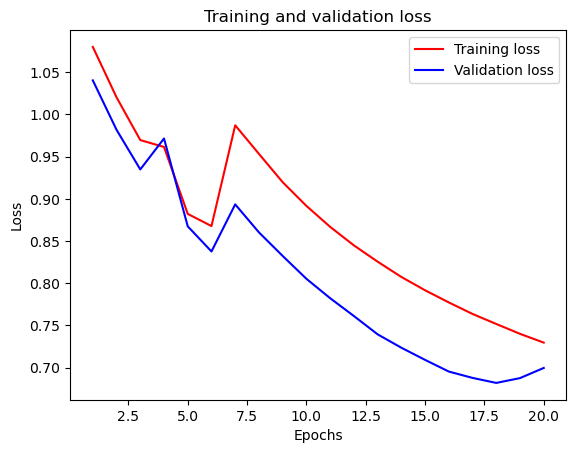

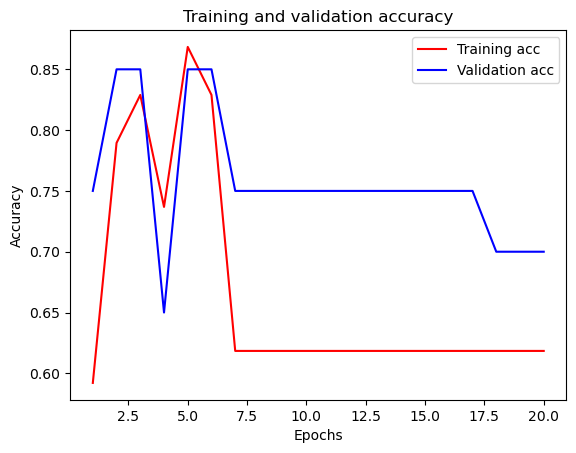

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(8192, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 1.0330 - accuracy: 0.7105 - val_loss: 0.9657 - val_accuracy: 0.8500
Epoch 2/20
76/76 [==============================] - 0s 890us/step - loss: 0.8435 - accuracy: 0.7763 - val_loss: 0.7156 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 0s 967us/step - loss: 0.5969 - accuracy: 0.8289 - val_loss: 0.5872 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.8158 - val_loss: 0.4827 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 0s 868us/step - loss: 0.4022 - accuracy: 0.8158 - val_loss: 0.4672 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 759us/step - loss: 0.3334 - accuracy: 0.8684 - val_loss: 0.4411 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 889us/step - loss: 0.2784 - accuracy: 0.8947 - val_l

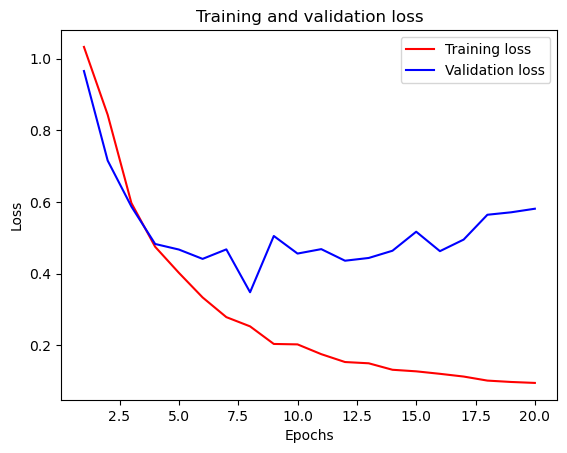

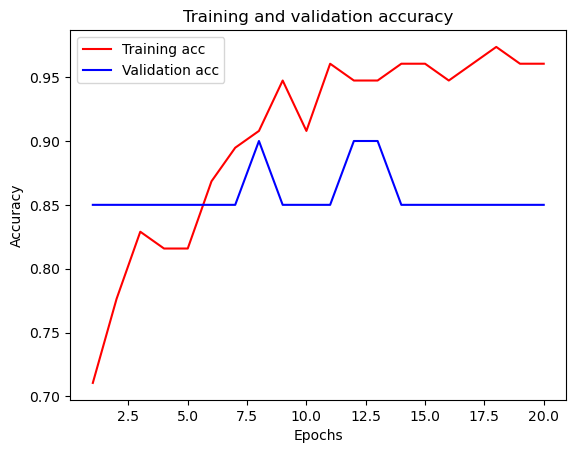

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 0.8280 - accuracy: 0.7368 - val_loss: 0.6743 - val_accuracy: 0.8000
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 0.5073 - accuracy: 0.8289 - val_loss: 0.4732 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 0s 906us/step - loss: 0.3748 - accuracy: 0.8553 - val_loss: 0.4650 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 0s 986us/step - loss: 0.2789 - accuracy: 0.8816 - val_loss: 0.4872 - val_accuracy: 0.8000
Epoch 5/20
76/76 [==============================] - 0s 889us/step - loss: 0.2296 - accuracy: 0.9211 - val_loss: 0.4852 - val_accuracy: 0.8000
Epoch 6/20
76/76 [==============================] - 0s 1ms/step - loss: 0.1992 - accuracy: 0.9079 - val_loss: 0.6478 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 0s 997us/step - loss: 0.1512 - accuracy: 0.9342 - val_los

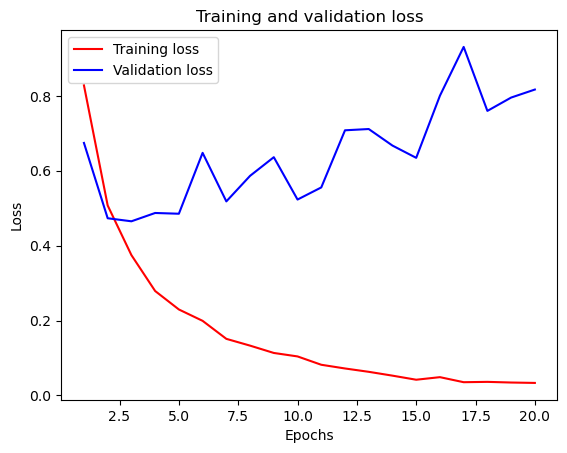

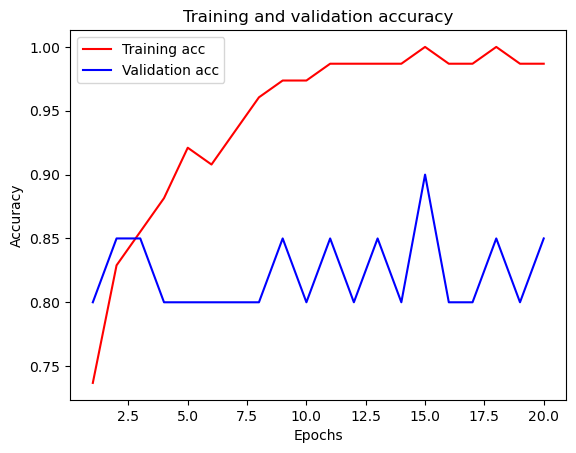

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 0.7710 - accuracy: 0.6974 - val_loss: 0.4721 - val_accuracy: 0.8500
Epoch 2/20
76/76 [==============================] - 0s 935us/step - loss: 0.4027 - accuracy: 0.8421 - val_loss: 0.4275 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 0s 908us/step - loss: 0.3068 - accuracy: 0.8684 - val_loss: 0.5291 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 0s 883us/step - loss: 0.2576 - accuracy: 0.8684 - val_loss: 0.4115 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 0s 948us/step - loss: 0.1954 - accuracy: 0.9342 - val_loss: 0.4561 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 1ms/step - loss: 0.1361 - accuracy: 0.9605 - val_loss: 0.4555 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 937us/step - loss: 0.1600 - accuracy: 0.9211 - val_l

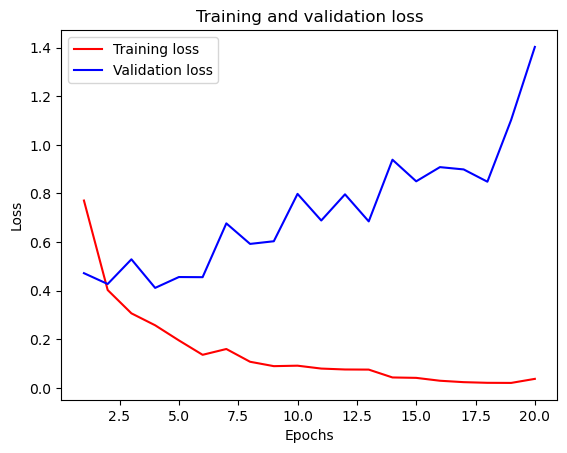

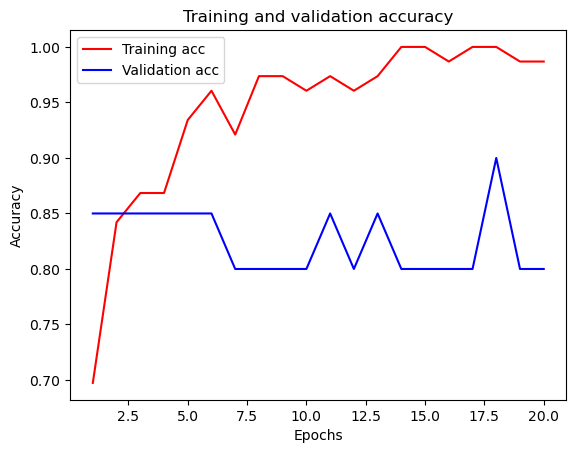

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.7237 - val_loss: 0.4146 - val_accuracy: 0.8500
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.8684 - val_loss: 0.4647 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 0s 1ms/step - loss: 0.2196 - accuracy: 0.8947 - val_loss: 0.6439 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 0s 1ms/step - loss: 0.2209 - accuracy: 0.9342 - val_loss: 0.5205 - val_accuracy: 0.8000
Epoch 5/20
76/76 [==============================] - 0s 1ms/step - loss: 0.1603 - accuracy: 0.9474 - val_loss: 0.7063 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 928us/step - loss: 0.1641 - accuracy: 0.9342 - val_loss: 0.7453 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 934us/step - loss: 0.0947 - accuracy: 0.9737 - val_loss: 0

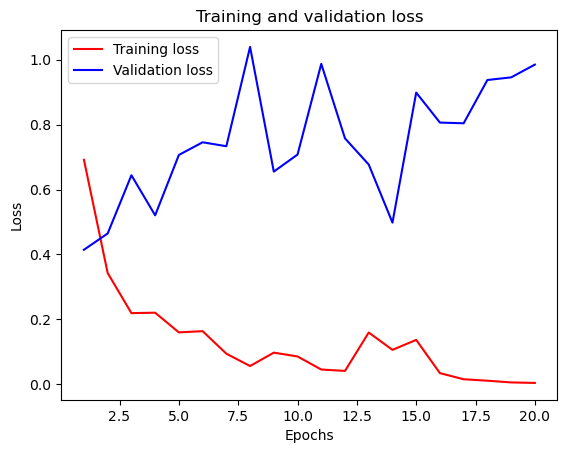

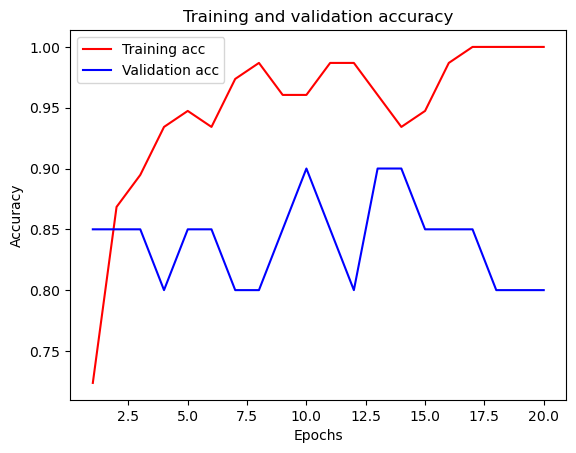

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 4ms/step - loss: 0.5973 - accuracy: 0.7237 - val_loss: 0.5006 - val_accuracy: 0.8500
Epoch 2/20
76/76 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8553 - val_loss: 0.5006 - val_accuracy: 0.8000
Epoch 3/20
76/76 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.8947 - val_loss: 0.6826 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9342 - val_loss: 0.6150 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 0s 2ms/step - loss: 0.1507 - accuracy: 0.9474 - val_loss: 0.5528 - val_accuracy: 0.9000
Epoch 6/20
76/76 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9474 - val_loss: 0.6249 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.9737 - val_loss: 0.864

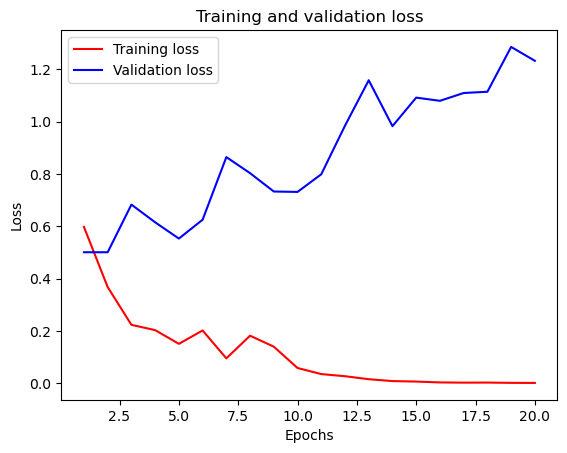

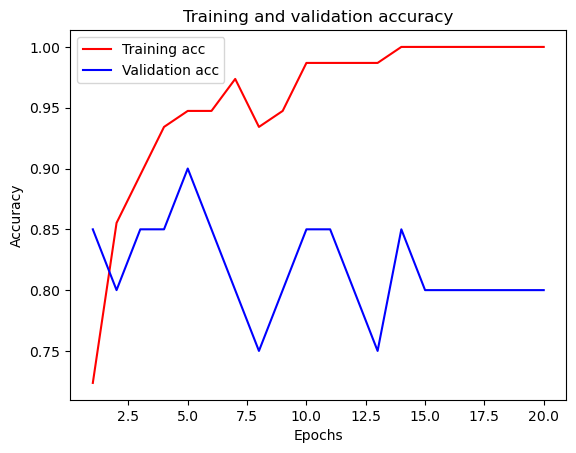

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 1s 10ms/step - loss: 0.5347 - accuracy: 0.7763 - val_loss: 0.6213 - val_accuracy: 0.8500
Epoch 2/20
76/76 [==============================] - 1s 7ms/step - loss: 0.4319 - accuracy: 0.7632 - val_loss: 0.4819 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 1s 8ms/step - loss: 0.4203 - accuracy: 0.8684 - val_loss: 0.4472 - val_accuracy: 0.8000
Epoch 4/20
76/76 [==============================] - 1s 8ms/step - loss: 0.1873 - accuracy: 0.9079 - val_loss: 0.7372 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 1s 8ms/step - loss: 0.2243 - accuracy: 0.9211 - val_loss: 0.8188 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 1s 8ms/step - loss: 0.1122 - accuracy: 0.9605 - val_loss: 1.3969 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 1s 8ms/step - loss: 0.1388 - accuracy: 0.9737 - val_loss: 1.06

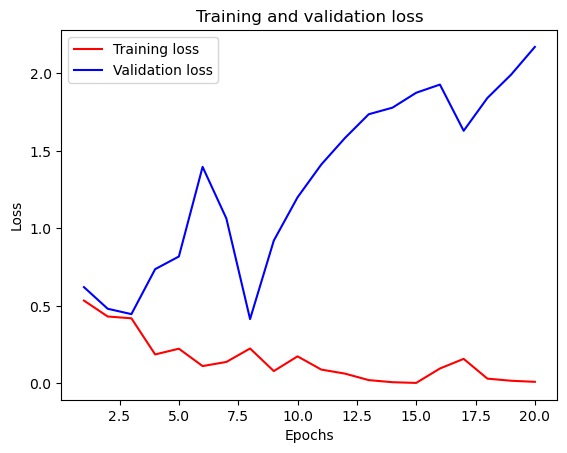

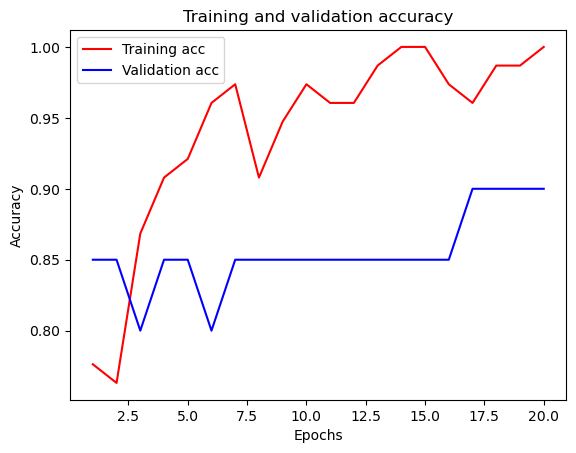

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 2s 27ms/step - loss: 0.7204 - accuracy: 0.7763 - val_loss: 0.3975 - val_accuracy: 0.8500
Epoch 2/20
76/76 [==============================] - 2s 24ms/step - loss: 0.3480 - accuracy: 0.8816 - val_loss: 0.7147 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 2s 24ms/step - loss: 0.3081 - accuracy: 0.9079 - val_loss: 0.4455 - val_accuracy: 0.9000
Epoch 4/20
76/76 [==============================] - 2s 25ms/step - loss: 0.3634 - accuracy: 0.9079 - val_loss: 0.3135 - val_accuracy: 0.9000
Epoch 5/20
76/76 [==============================] - 2s 25ms/step - loss: 0.1108 - accuracy: 0.9474 - val_loss: 0.7879 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 2s 26ms/step - loss: 0.3169 - accuracy: 0.9079 - val_loss: 0.7404 - val_accuracy: 0.7500
Epoch 7/20
76/76 [==============================] - 2s 27ms/step - loss: 0.2204 - accuracy: 0.9211 - val_loss

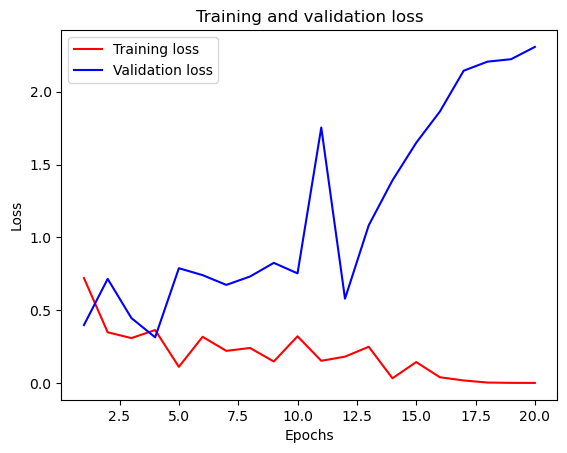

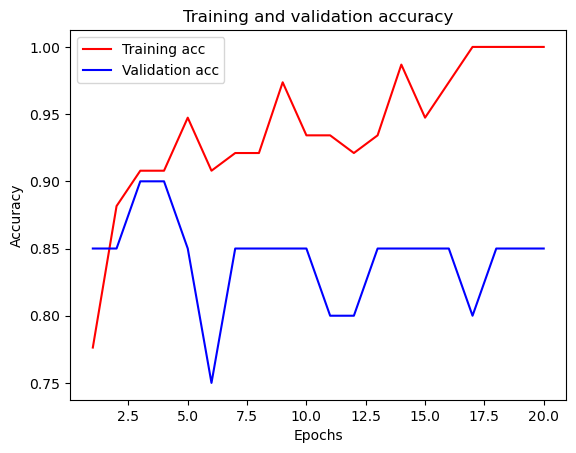

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 4ms/step - loss: 0.9313 - accuracy: 0.6316 - val_loss: 0.6559 - val_accuracy: 0.7500
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.8289 - val_loss: 0.8113 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.8947 - val_loss: 0.3790 - val_accuracy: 0.9500
Epoch 4/20
76/76 [==============================] - 0s 1ms/step - loss: 0.2600 - accuracy: 0.9474 - val_loss: 0.6624 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.9079 - val_loss: 0.6108 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 1ms/step - loss: 0.1989 - accuracy: 0.9211 - val_loss: 0.6221 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 0s 1ms/step - loss: 0.1158 - accuracy: 0.9474 - val_loss: 0.976

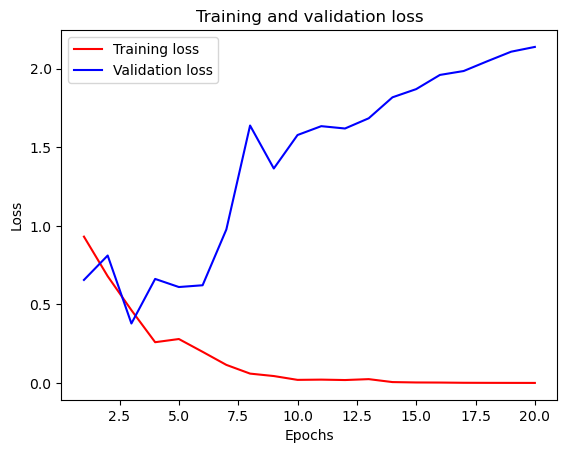

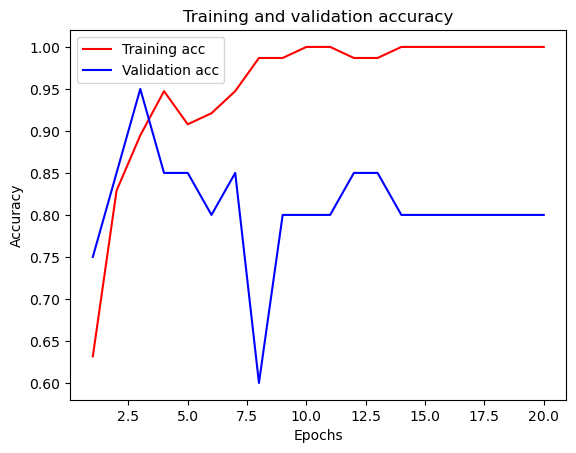

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 1.0470 - accuracy: 0.4079 - val_loss: 1.0081 - val_accuracy: 0.3500
Epoch 2/20
76/76 [==============================] - 0s 1ms/step - loss: 0.9229 - accuracy: 0.5526 - val_loss: 0.8958 - val_accuracy: 0.6000
Epoch 3/20
76/76 [==============================] - 0s 1ms/step - loss: 0.7656 - accuracy: 0.8289 - val_loss: 0.7420 - val_accuracy: 0.8000
Epoch 4/20
76/76 [==============================] - 0s 1ms/step - loss: 0.5970 - accuracy: 0.7895 - val_loss: 0.5444 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 0s 975us/step - loss: 0.4641 - accuracy: 0.8684 - val_loss: 0.4676 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8553 - val_loss: 0.4264 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 774us/step - loss: 0.3431 - accuracy: 0.8947 - val_loss: 0

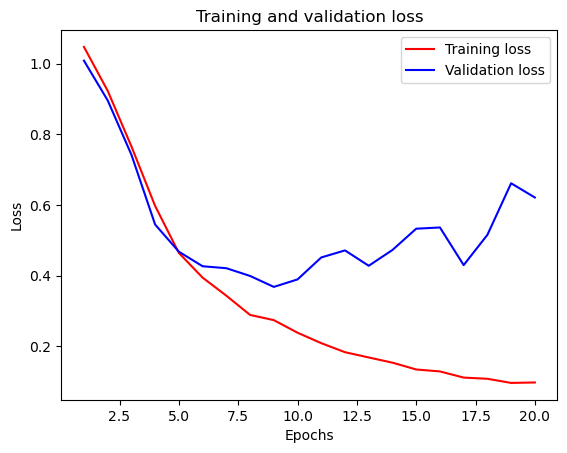

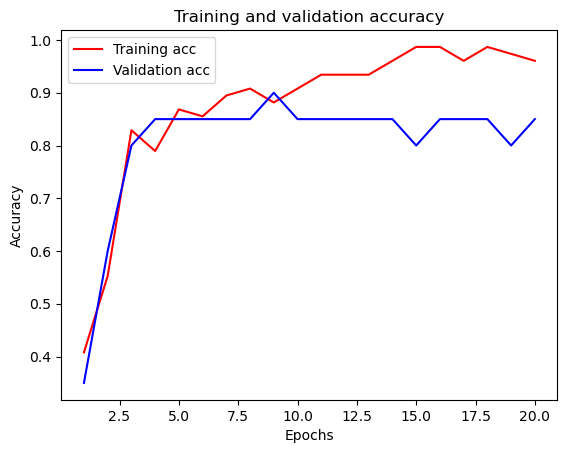

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/40
76/76 [==============================] - 0s 3ms/step - loss: 0.9156 - accuracy: 0.5395 - val_loss: 0.8391 - val_accuracy: 0.3500
Epoch 2/40
76/76 [==============================] - 0s 887us/step - loss: 0.6900 - accuracy: 0.6974 - val_loss: 0.7239 - val_accuracy: 0.8500
Epoch 3/40
76/76 [==============================] - 0s 895us/step - loss: 0.5555 - accuracy: 0.7895 - val_loss: 0.6199 - val_accuracy: 0.8500
Epoch 4/40
76/76 [==============================] - 0s 907us/step - loss: 0.4574 - accuracy: 0.8289 - val_loss: 0.5103 - val_accuracy: 0.8500
Epoch 5/40
76/76 [==============================] - 0s 1ms/step - loss: 0.3714 - accuracy: 0.8553 - val_loss: 0.5115 - val_accuracy: 0.8500
Epoch 6/40
76/76 [==============================] - 0s 954us/step - loss: 0.3176 - accuracy: 0.8816 - val_loss: 0.4744 - val_accuracy: 0.8500
Epoch 7/40
76/76 [==============================] - 0s 973us/step - loss: 0.2731 - accuracy: 0.8947 - val_l

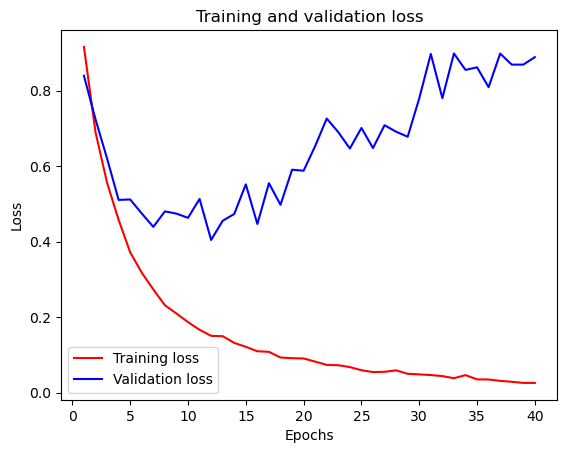

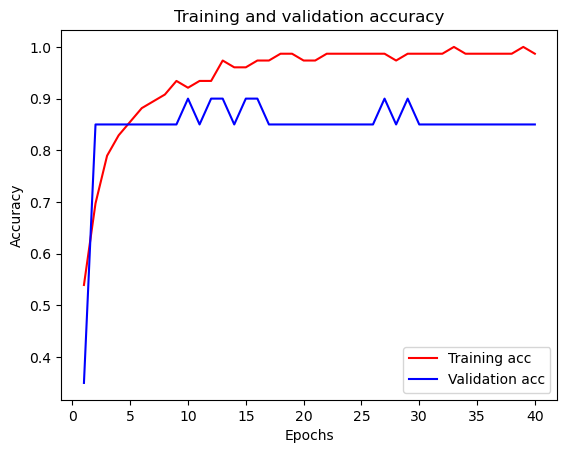

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 40
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/120
76/76 [==============================] - 0s 2ms/step - loss: 1.1175 - accuracy: 0.0921 - val_loss: 0.9995 - val_accuracy: 0.5000
Epoch 2/120
76/76 [==============================] - 0s 99us/step - loss: 1.0057 - accuracy: 0.5658 - val_loss: 0.8799 - val_accuracy: 0.7500
Epoch 3/120
76/76 [==============================] - 0s 105us/step - loss: 0.9164 - accuracy: 0.6316 - val_loss: 0.7846 - val_accuracy: 0.7500
Epoch 4/120
76/76 [==============================] - 0s 105us/step - loss: 0.8430 - accuracy: 0.6711 - val_loss: 0.7062 - val_accuracy: 0.7500
Epoch 5/120
76/76 [==============================] - 0s 106us/step - loss: 0.7792 - accuracy: 0.6711 - val_loss: 0.6457 - val_accuracy: 0.7500
Epoch 6/120
76/76 [==============================] - 0s 132us/step - loss: 0.7271 - accuracy: 0.6974 - val_loss: 0.5990 - val_accuracy: 0.7500
Epoch 7/120
76/76 [==============================] - 0s 105us/step - loss: 0.6798 - accuracy: 0.7105

76/76 [==============================] - 0s 132us/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.9166 - val_accuracy: 0.8000
Epoch 114/120
76/76 [==============================] - 0s 92us/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.9250 - val_accuracy: 0.8000
Epoch 115/120
76/76 [==============================] - 0s 79us/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.9379 - val_accuracy: 0.8000
Epoch 116/120
76/76 [==============================] - 0s 105us/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.9482 - val_accuracy: 0.8000
Epoch 117/120
76/76 [==============================] - 0s 92us/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.9574 - val_accuracy: 0.8000
Epoch 118/120
76/76 [==============================] - 0s 105us/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.9601 - val_accuracy: 0.8000
Epoch 119/120
76/76 [==============================] - 0s 105us/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.9471 - val_accuracy: 0.8000
Ep

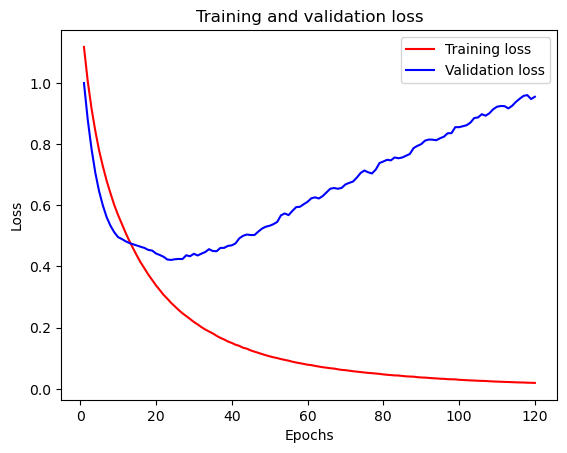

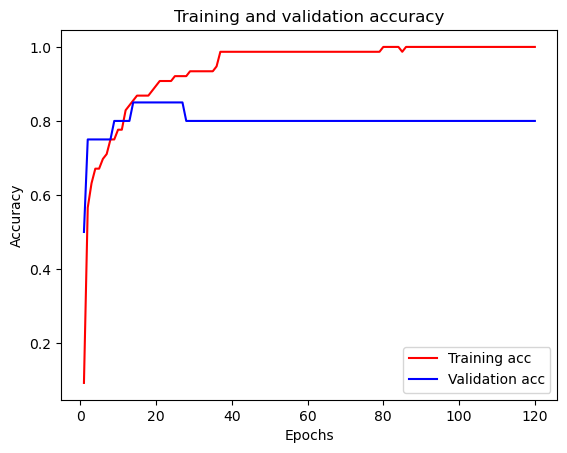

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 120
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/120
76/76 [==============================] - 0s 2ms/step - loss: 1.1379 - accuracy: 0.3158 - val_loss: 1.1118 - val_accuracy: 0.3000
Epoch 2/120
76/76 [==============================] - 0s 93us/step - loss: 1.0557 - accuracy: 0.4342 - val_loss: 1.0325 - val_accuracy: 0.3500
Epoch 3/120
76/76 [==============================] - 0s 65us/step - loss: 0.9828 - accuracy: 0.5658 - val_loss: 0.9591 - val_accuracy: 0.5500
Epoch 4/120
76/76 [==============================] - 0s 92us/step - loss: 0.9159 - accuracy: 0.7237 - val_loss: 0.8909 - val_accuracy: 0.7500
Epoch 5/120
76/76 [==============================] - 0s 67us/step - loss: 0.8556 - accuracy: 0.8158 - val_loss: 0.8299 - val_accuracy: 0.8000
Epoch 6/120
76/76 [==============================] - 0s 79us/step - loss: 0.8035 - accuracy: 0.8026 - val_loss: 0.7740 - val_accuracy: 0.8000
Epoch 7/120
76/76 [==============================] - 0s 66us/step - loss: 0.7539 - accuracy: 0.8289 - va

76/76 [==============================] - 0s 105us/step - loss: 0.0587 - accuracy: 0.9868 - val_loss: 0.6618 - val_accuracy: 0.8000
Epoch 114/120
76/76 [==============================] - 0s 303us/step - loss: 0.0577 - accuracy: 0.9868 - val_loss: 0.6580 - val_accuracy: 0.8000
Epoch 115/120
76/76 [==============================] - 0s 126us/step - loss: 0.0567 - accuracy: 0.9868 - val_loss: 0.6476 - val_accuracy: 0.8000
Epoch 116/120
76/76 [==============================] - 0s 66us/step - loss: 0.0555 - accuracy: 0.9868 - val_loss: 0.6424 - val_accuracy: 0.8000
Epoch 117/120
76/76 [==============================] - 0s 79us/step - loss: 0.0544 - accuracy: 0.9868 - val_loss: 0.6427 - val_accuracy: 0.8000
Epoch 118/120
76/76 [==============================] - 0s 105us/step - loss: 0.0536 - accuracy: 0.9868 - val_loss: 0.6448 - val_accuracy: 0.8000
Epoch 119/120
76/76 [==============================] - 0s 92us/step - loss: 0.0528 - accuracy: 0.9868 - val_loss: 0.6482 - val_accuracy: 0.8000
Ep

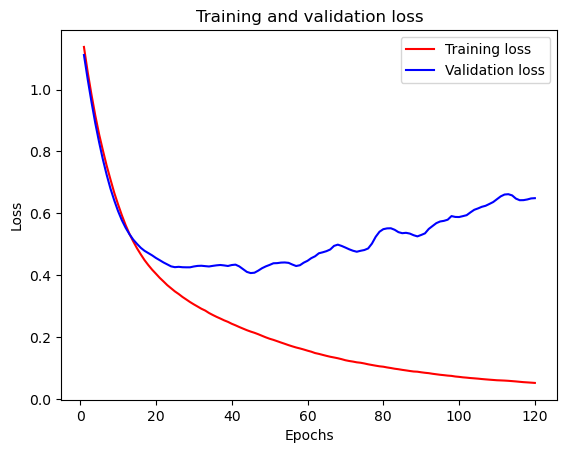

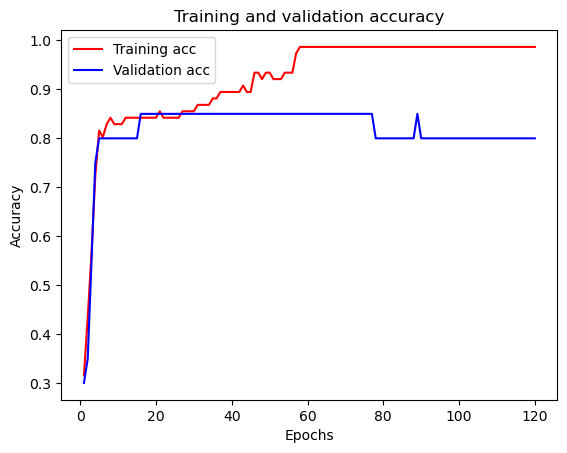

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 120
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 2ms/step - loss: 1.1999 - accuracy: 0.1579 - val_loss: 1.0957 - val_accuracy: 0.3000
Epoch 2/20
76/76 [==============================] - 0s 119us/step - loss: 1.0528 - accuracy: 0.4079 - val_loss: 0.9581 - val_accuracy: 0.7000
Epoch 3/20
76/76 [==============================] - 0s 145us/step - loss: 0.9301 - accuracy: 0.6711 - val_loss: 0.8434 - val_accuracy: 0.8000
Epoch 4/20
76/76 [==============================] - 0s 132us/step - loss: 0.8243 - accuracy: 0.7500 - val_loss: 0.7485 - val_accuracy: 0.7500
Epoch 5/20
76/76 [==============================] - 0s 146us/step - loss: 0.7407 - accuracy: 0.7632 - val_loss: 0.6700 - val_accuracy: 0.8000
Epoch 6/20
76/76 [==============================] - 0s 138us/step - loss: 0.6695 - accuracy: 0.7895 - val_loss: 0.6089 - val_accuracy: 0.8000
Epoch 7/20
76/76 [==============================] - 0s 92us/step - loss: 0.6070 - accuracy: 0.8158 - val_

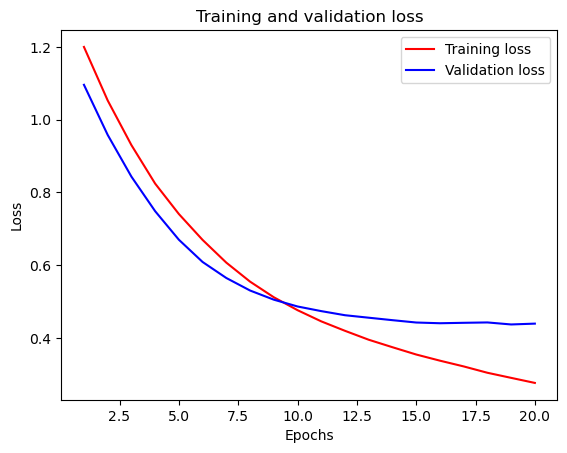

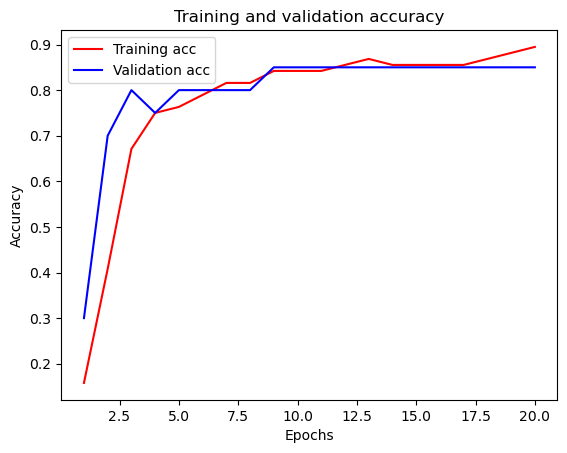

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


